# A1: Python Analysis
<br>
<br>
<br>
<strong>Team Name: HULT_BOSTON_13</strong><br>
<br><strong>Team 13 Members:</strong><br>  
    Rafael de la Cajiga<br>
    Guillaume Chosson<br>
    Axel Gripenlöf Karlberg<br>
    Adrian Lopez Perales<br>
    Martina Aranda Rivera<br>
    
<strong>Date:</strong> Feb. 26, 2022<br>
<strong>Professor:</strong> Thomas Kurnicki<br> 
<strong>Business Challenge #2 <br>
<strong>Hult International Business School </strong><br>
-----------------------------------------

<h1>Introduction:</h1>

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

training_dataset = "./train.csv"
testing_dataset ="./test.csv"
sample_submission = "./sample_submission.csv"

# reading in the .csv file with pandas
housing_train = pd.read_csv(filepath_or_buffer =training_dataset)


# checking basic info about the dataset
housing_train.info(verbose = False)

# importing the testing dataset
housing_test = pd.read_csv(filepath_or_buffer = testing_dataset)

# checking basic info about the dataset
housing_test.columns

df = [housing_train, housing_test]
housing_data = pd.concat(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


This challenge involves analyzing and making projections on future sales prices for the housing market in Ames, Iowa. The provided data consists of one dataset split into Train and Test tables, each containing over 1,400 entries and 80+ columns describing different qualitative and quantitative variables. The first step is to clean the data and prepare it for analysis using feature engineering techniques. The next step is to run different regression models to obtain the most precise projections. The objective of this competition is to achieve the lowest error or the most accurate model, resulting in the best prediction. The better the prediction, the more precise the analysis and actionable insights obtained through predictive modeling and data cleaning.

<h2>Data cleaning and Preprocessing </h2>

Data cleaning and preprocessing are crucial steps in any data analysis project. The team began by identifying strings, floats, and integers to achieve a clean dataset. Next, all missing values were replaced with the median or with other values that fit the column data better. The team then performed data type conversions, like booleans, to ensure that the data types were appropriate for each feature. Finally, methods like loc, iloc, and head helped limit the outputs and create visualizations and tables to show the preprocessing results. 

C:\Users\axelk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


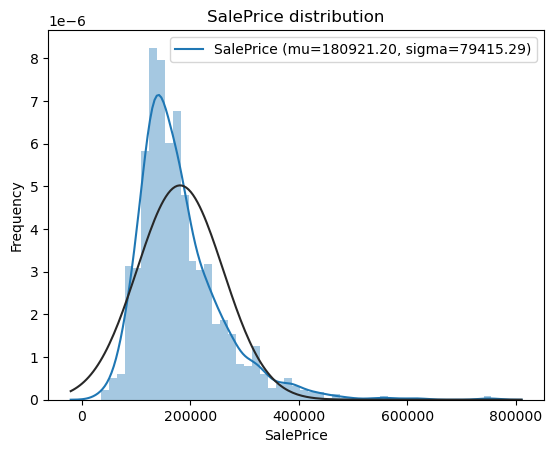

In [2]:
# Importing scipy.stats library
from scipy.stats import norm


# Remove NaN values from the 'SalePrice' column
saleprice_clean = housing_data['SalePrice'].dropna()

# SalePrice target variable analysis
sns.distplot(saleprice_clean, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(saleprice_clean)
plt.legend(['SalePrice (mu={:.2f}, sigma={:.2f})'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

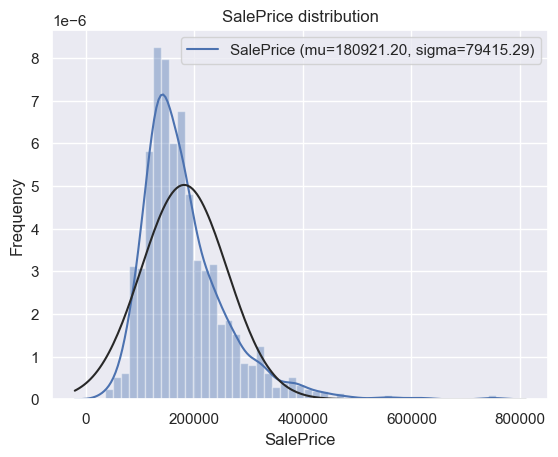

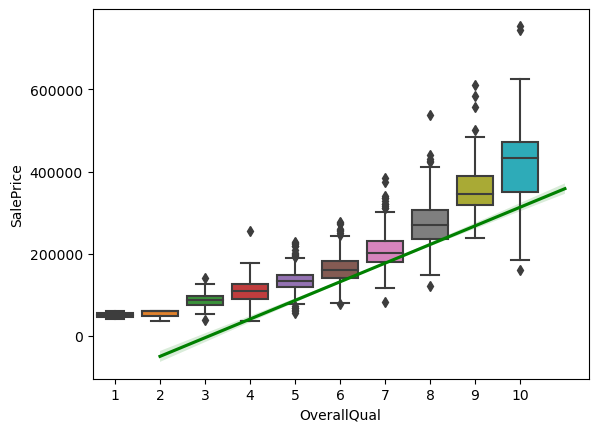

In [3]:
# Boxplot with a regression line between OverallQual on the x-axis and 
# SalePrice on the y-axis

sns.boxplot(data=housing_data, x='OverallQual', y='SalePrice')
sns.regplot(data=housing_data, x='OverallQual', y='SalePrice', scatter=False, color='green')
plt.show()

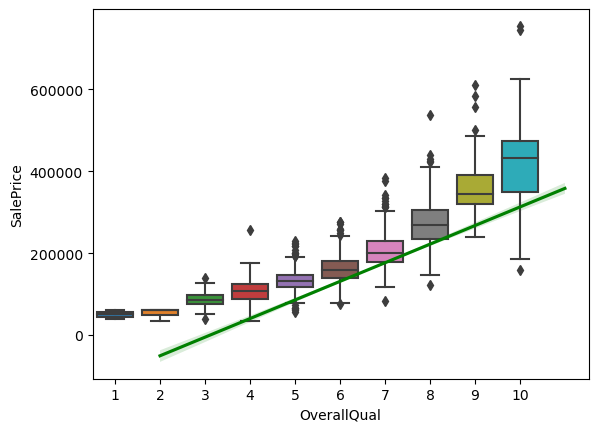

After running a correlation between the sale price and all the X variables, the results indicate that the property's overall quality was the most correlated variable. The boxplot above visualizes the relationship between the sales price and overall quality. Even though the data used for the plotting is not clean, it helps illustrate the behavior of the database. The qualitative data were transformed into binary using dummy variables, resulting in exact statistics, comparisons, and a thorough analysis of all the variables. The goal is to predict future sale prices as accurately as possible. 

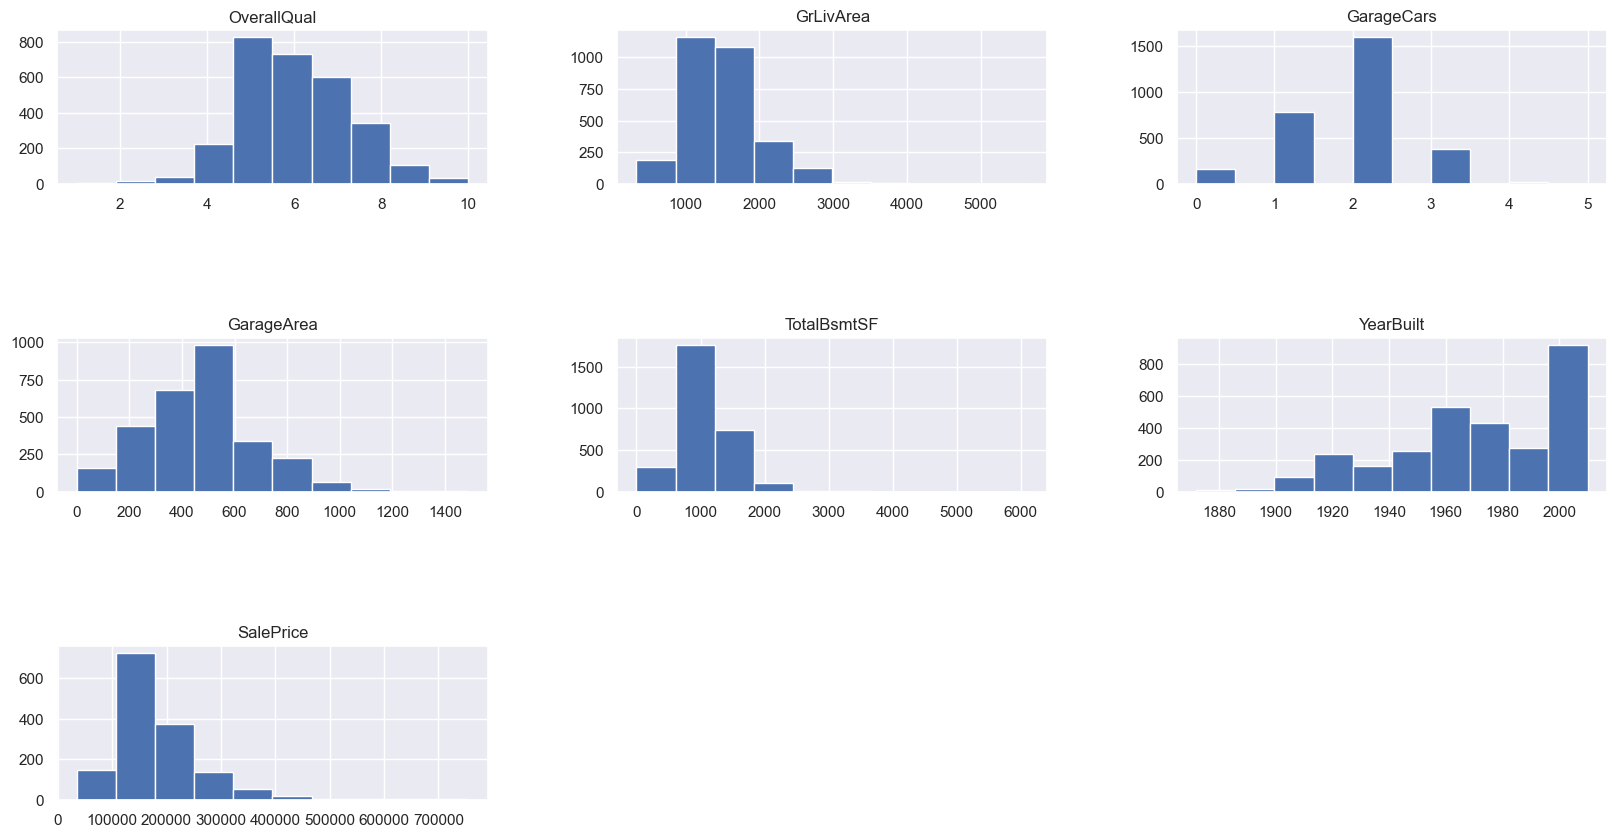

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3139813005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HousingNum['SalePrice'] = salePriceClean
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3139813005.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  HousingNum.hist(ax = ax)


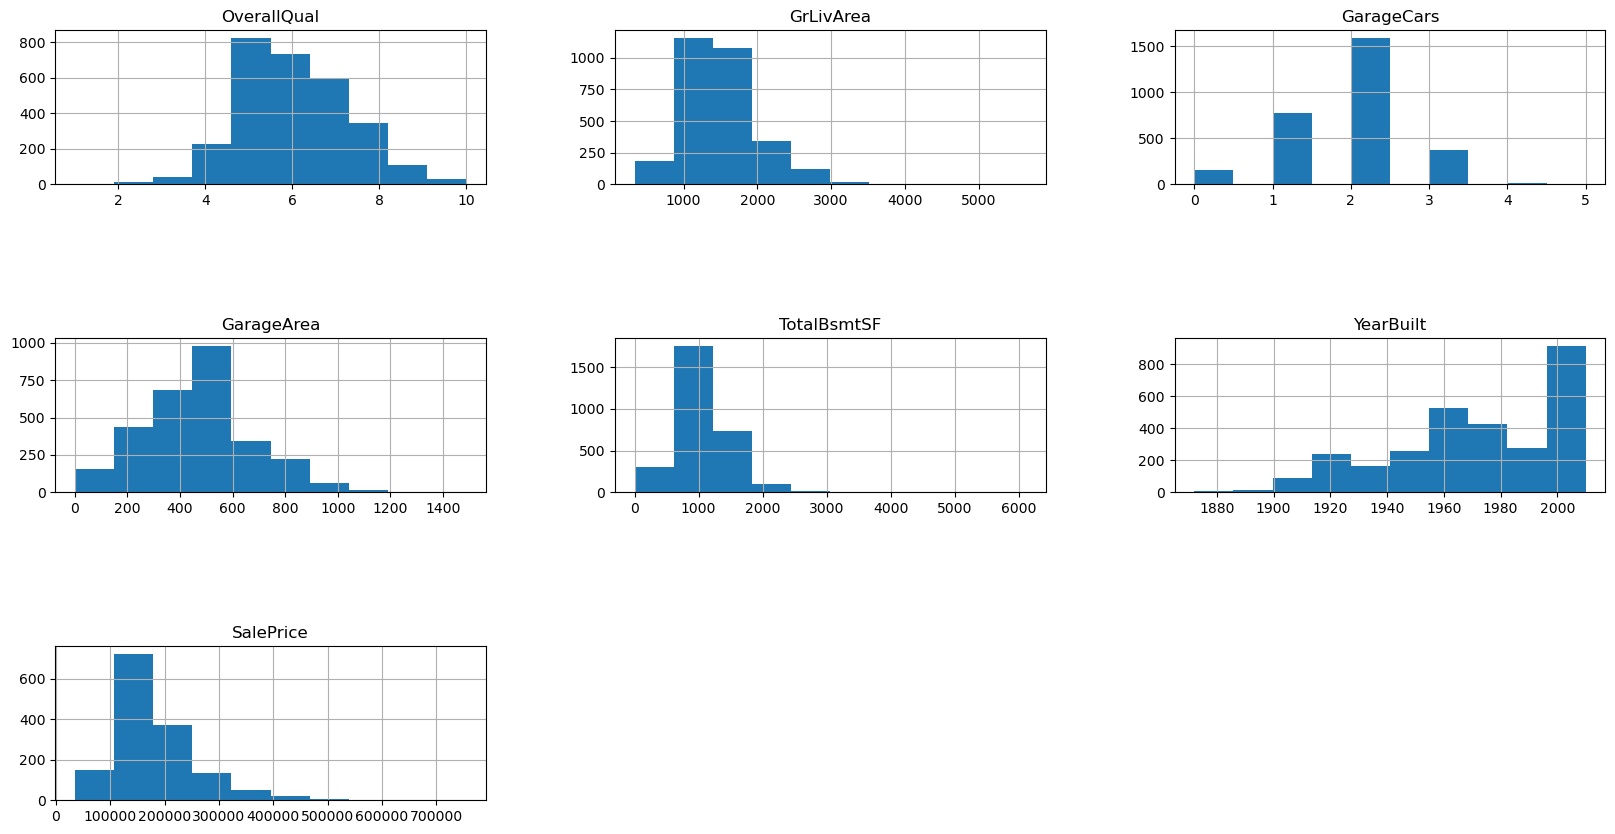

In [4]:
# Assigning the y_train to a variable salePriceClean
salePriceClean = housing_data.SalePrice

# Creating a list of numeric variables
HousingNum = housing_data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt',  'Condition1']]
HousingNum['SalePrice'] = salePriceClean

# Defining figure size of plots
fig = plt.figure(figsize=[20,10])
# get current axis = gca
ax = fig.gca()

# We here will apply to the last one described...
HousingNum.hist(ax = ax)
plt.subplots_adjust(hspace=1)

The next step is feature engineering, which results in new columns; these new variables must pass through the same data-cleaning process. 

Lastly, the 'train' database will have a similar process, creating dummies and boolean columns. This includes checking for missing values and scaling the data if necessary. Once the data is clean, it can be analyzed using various statistical and machine-learning techniques to derive insights and make predictions.

In [5]:
#EDA and Data visualization of base information.
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
# set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<h1>Exploratory Analysis</h1>

Everyone interested in the housing industry should know that each house is different and every characteristic affects the final sales price. These characteristics may include: having enough space for more than one car in the garage, having an unfinished basement, or having more than one bathroom. Knowing how to find one's dream house shouldn't be a tedious experience; it's a journey in search of a place to build a home that fits one's needs. 

Ames, Iowa, currently has one of the most diverse neighborhoods. It has houses that were built from the 1860s all the way to 2010. The materials and shapes vary over the decades, making the neighborhoods more attractive and having a big sale prices range. 

Clients have different preferences in houses, neighborhoods, and overall quality. To be able to find their perfect fit, the Sale Prices are divided into three bins. <br>
- Low range: `$40,000` to `$130,000`
- Medium range: `$140,000` to `$220,000`
- High range: `$225,000` to `$501,837`

Finding the optimal house is a challenging task. Hopefully, the following analysis can help one find their future home.

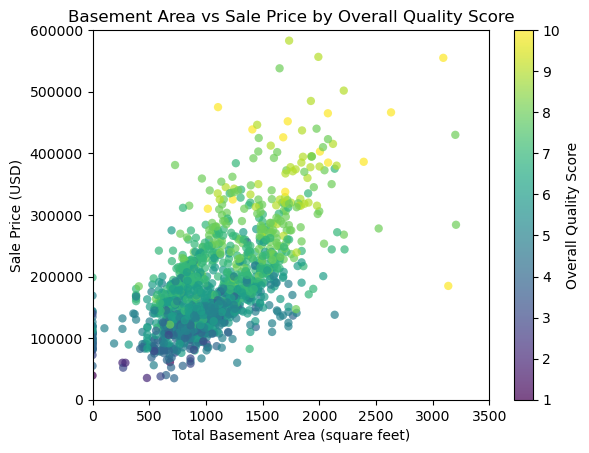

In [7]:

# Create a scatter plot of TotalBsmtSF vs SalePrice, colored by OverallQual
plt.scatter(x=housing_data['TotalBsmtSF'], y=housing_data['SalePrice'], c=housing_data['OverallQual'], cmap='viridis', alpha=0.7, edgecolors='none')
plt.colorbar().set_label('Overall Quality Score')
plt.xlabel('Total Basement Area (square feet)')
plt.ylabel('Sale Price (USD)')
plt.title('Basement Area vs Sale Price by Overall Quality Score')

# Set x and y axis limits to zoom in on the scatter plot
plt.xlim(0, 3500)
plt.ylim(0, 600000)

plt.show()

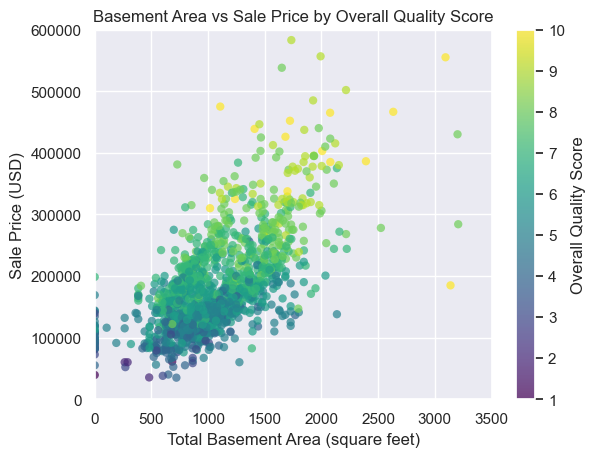

The Basement Area vs. Sale Price by Overall Quality Score scatterplot shows the relationship between the sale price and the total basement area of the house, with each house colored by their overall quality score. There is a positive correlation between the total basement square feet and the sale price of houses. The bigger the basement, the higher the sale prices. The outliers show that there are houses where the basement area is above average, proving that the basement size is more important than the overall quality variable. <br>

Overall, this plot effectively communicates the relationship between these variables and provides insight into the factors influencing housing prices. <br>

As mentioned in Zillow.com, "...there are buyers that actively seek homes with finished basements. And in a competitive buyers market, your home can really stand out among other for-sale homes if it is one of only a few with a finished, functional basement."(Zillow) Buyers need to consider all the factors they need and want, as basements come with different characteristics that affect the price. 

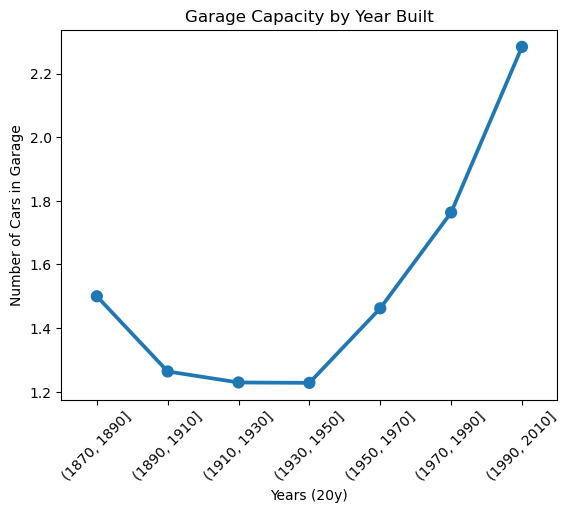

In [8]:
# Binning YearBuilt, each bin includes 20 years. 
housing_data['year_bins'] = pd.cut(housing_data['YearBuilt'], bins=range(1870, 2011, 20))

# Point plot showing the relationship between the year bins and the number of 
#cars that can fit in the garage.
sns.pointplot(x='year_bins', y='GarageCars', data=housing_data, ci=None)

# Defining plot labels, font size, and the rotation of x-labels.
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.xlabel('Years (20y)')
plt.ylabel('Number of Cars in Garage')
plt.title('Garage Capacity by Year Built')
plt.show()

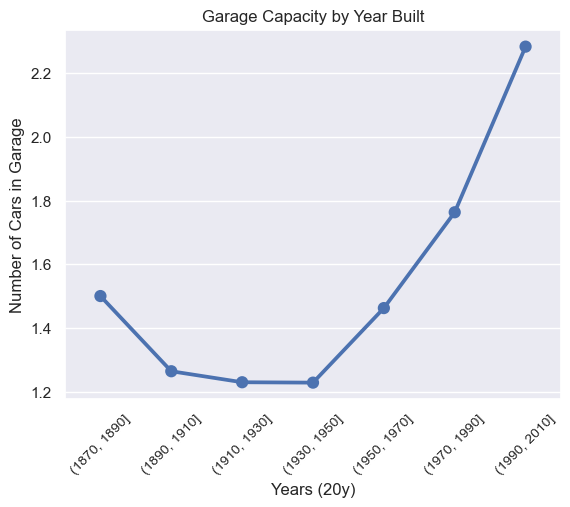

The 'Garage Capacity by Year Built' scatterplot with a line represents the relationship between the year the houses were built and the average number of cars that fit in the garage. The data is grouped by decade, and each data point averages the number of garage cars for all the houses built in that decade. The trend line indicates that the average number of garage cars has increased. The 1940s and 1950s saw a dip in the average number of garage cars, but since the 1970s, the trend has been consistently upwards.

This data suggests that having more garage space is becoming increasingly important to homeowners and may reflect the growing number of vehicles that households own. It also indicates people's increasing value on car ownership and transportation and the need to accommodate these vehicles in their homes. The trend towards larger garages is also due to increasing multi-car households or the need for storage space.

This trend may have significant implications for the future of housing design and construction. Architects and builders may need to consider larger garage spaces and additional storage areas when designing new homes. It may also impact the layout and structure of houses, with more emphasis on incorporating garage space as a key feature. This may lead to changes in the traditional home design, with the garage potentially becoming a more prominent feature than in the past. Overall, this trend towards larger garage space reflects homeowners' changing needs and preferences and may have lasting implications for the future of housing.

In [9]:
# Bins for Sale Price to understand our consumer price bench marks into low, medium, high Sale Price
sp_bins = pd.qcut(housing_data['SalePrice'], q=3, labels=['low','medium','high'])

ValueError: cannot set using a list-like indexer with a different length than the value

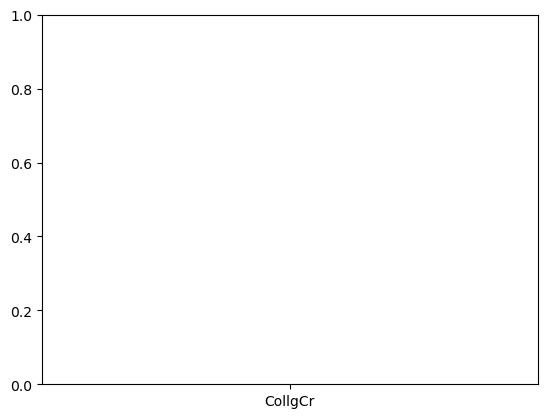

In [10]:
# Sale Price by Neighborhood, boxplot. 
# Defining plot labels, and the rotation of x-labels.

sns.histplot(data= housing_data,
            x='Neighborhood',
            hue=sp_bins)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Sale Price by Neighborhood')
plt.xticks(rotation = 90)
plt.show()

# The hue option does not seem to be working in windowns, but yes macs.
# We do not know why this is happening. Sorry.

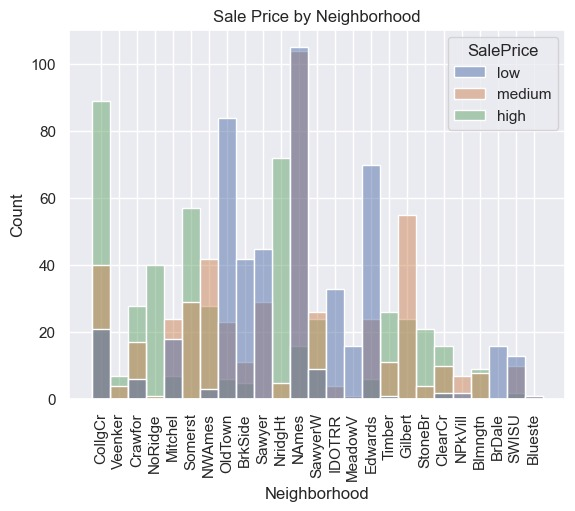

The Sale Price by Neighborhood histogram shows the three different price ranges for each neighborhood available. Using the histogram allows a clear visual representation of the availability of houses in the neighborhood. Here it's clear that some neighborhoods have more representation in one range than another. If clients want to buy houses in the low range, they should focus on the NAmes neighborhood and OldTown. Clients in the medium range should focus on buying homes in NAmes and Gilbert neighborhoods. Clients interested in the high range should focus on looking for homes in the CollgCr and NridgHt neighborhoods

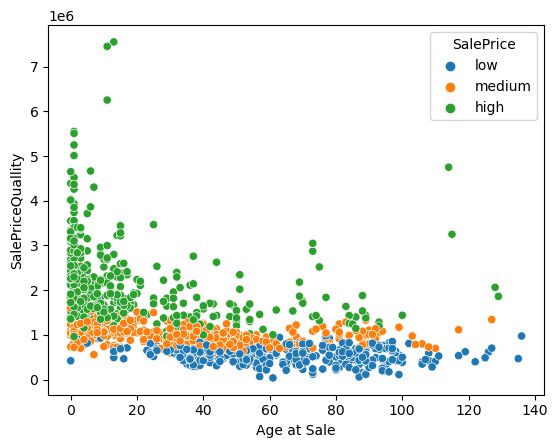

In [11]:
# Theese are two of the Feature Engineering that will be explained under the Feature Engineering section.
housing_data['AgeAtSale'] = (housing_data['YrSold'] - housing_data['YearBuilt']).round()
housing_data['SalePriceQuallity'] = (housing_data['SalePrice'] * housing_data['OverallQual']).round()

# Sale Price by Age at Sale, boxplot. 
sns.scatterplot(data=housing_data, 
             y='SalePriceQuallity', 
             x='AgeAtSale',
                hue= sp_bins
            )

# Set the x and y labels
plt.xlabel('Age at Sale')
#plt.ylabel('Count')

# Show the plot
plt.show()

# The hue option does not seem to be working in windowns, but yes macs.
# We do not know why this is happening. Sorry.

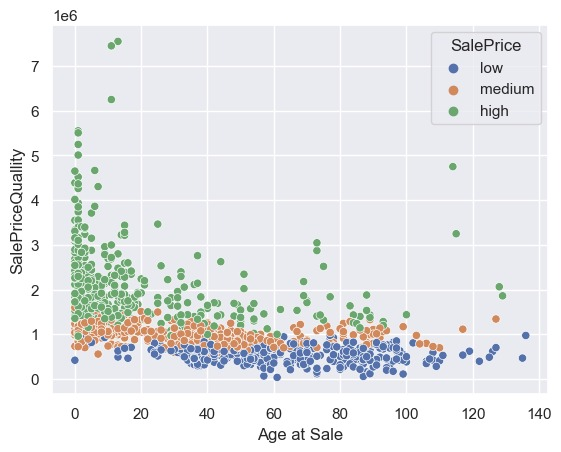

The Sale Price by Age at Sale shows how the age of the house affects the Sale Price. This visual helps the client find a house that fits their needs based on historical and current necessities based on their price range. Clients in the high range are largely focused on newer houses, the meaning of younger age. Clients in the medium can purchase houses of any age, allowing more flexibility. Clients in the low range are not recommended to purchase houses at younger ages. They focus on houses aged between 40 to 100 years. This can be a predictor for people interested in flipping houses, meaning purchasing lowered prices homes with great structural foundations and character.

C:\Users\axelk\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

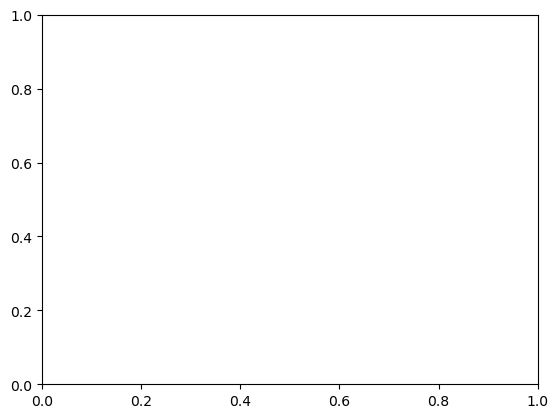

In [12]:
#Sale Price by Overall Quality, boxplot. 

sns.histplot(data= housing_data,
            x='OverallQual',
            hue=sp_bins)

# Defining plot labels.
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.title('Sale Price by Overall Quality')
plt.show()

# The hue option does not seem to be working in windowns, but yes macs.
# We do not know why this is happening. Sorry.

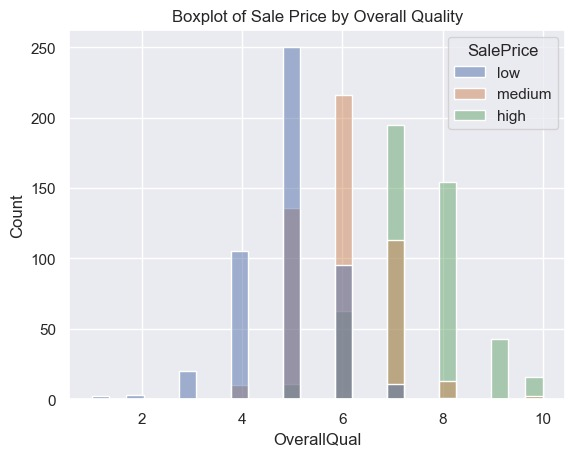

The Sale Price and Overall Quality histogram prove that these two variables are correlated, meaning that the quality of the house is directly reflected in the sale price. Clients in the lower range tend to purchase houses qualified between 1 and 7, making it a wide category. This means that they can have good quality homes at a lower price. Clients in the middle range can move around the qualities, as they may find homes from qualities between 4 and 8. Clients in the higher range may around play around with all the data but are mostly focused on homes with quality scores between 7 and 10.

C:\Users\axelk\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

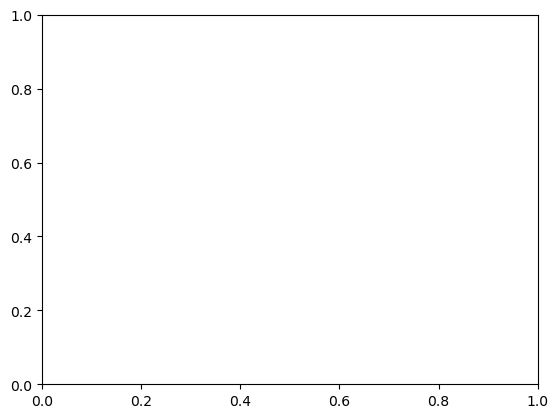

In [13]:
# Sale Price by GrLivArea, boxplot. 

sns.histplot(data= housing_data,
            x='GrLivArea',
            hue=sp_bins)

# Defining plot labels.
plt.xlabel('GrLivArea')
plt.ylabel('Count')
plt.title('Sale Price by Great Living Area')
plt.show()

# The hue option does not seem to be working in windowns, but yes macs.
# We do not know why this is happening. Sorry.

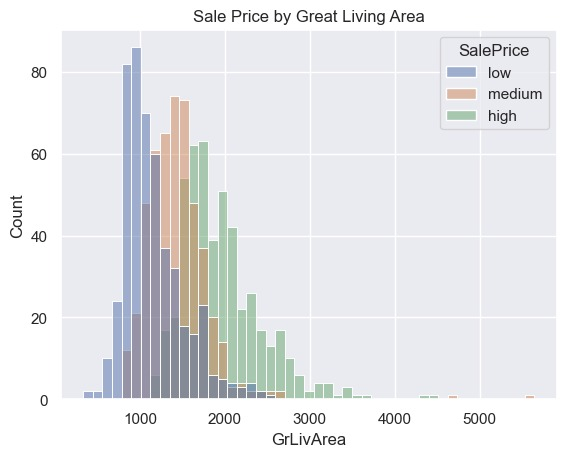

The Sale Price by Great Living Area histogram shows how the area of the house is influenced by price. The graph is positively skewed, showing that the price has a range for the square feet of livable area. Clients in the lower range can find houses between 500 and 2000 sqft houses. Clients in the middle range can find houses sized between 1000 and 2500 sqft. Clients in the high range can find houses sized between 1000 and 4500 sqft. Houses' general living areas can be available almost at every price range.

<h1>Actionable Insights:</h1>

## Actionable Insight 1: Cars x Garage for every year 

Home builders and real estate developers should consider including at least one or two garage spaces in their designs, as they are highly desired. Moving forward, this can be translated as a requirement for the adaptability of houses for electric cars. Nowadays, a high purchasing power client will look for a house adapted to fit at least two cars. Due to technological advancements between 2010 and today, having a charging station for electric cars is becoming a commodity.<br>

"Considering that more than half of Gen Zers and Millennials think gasoline-powered vehicles should be phased out completely over the next decade or two and that Millennials make up the biggest portion of home buyers today, it's safe to say homes equipped with EV chargers will be a hot commodity very soon." (Sparks,2021)

This is likely due to the growing popularity of electric vehicles and the increasing demand for charging infrastructure. Homebuyers who own or plan to purchase an electric car may be willing to pay more for a home with charging capabilities, especially if public charging stations are limited in their area. Additionally, installing a charging station may add value to a property by improving its sustainability and reducing reliance on fossil fuels. However, the impact of electric car charging stations on house prices may vary depending on location, home price range, and accessibility to public transportation. As the market for electric vehicles continues to grow, the presence of charging stations may become an increasingly important factor for homebuyers to consider.

## Actionable Insight 2: Sale Price at Age of Sale

Buying a house aged around 50-100 years old has its pros as well as its cons. One must understand both as they reflect on the sale price and the additional cost for restorations and reparations. According to Rocket Mortgage, some pros include: architecture, mature landscaping, established neighborhood, and lower costs. (Ziraldo, 2023) The architecture creates an impression on most consumers, reflecting the passing of time and some features and craftsmanship that cannot be found in newer homes. Mature landscaping encapsulates the greenery; this may include having larger yards and trees that have been there longer than the house itself. Some experts explain that having more greenery around houses has emotional benefits. Houses in established neighborhoods benefit from being in centralized locations, meaning that the chance of going under changes is pretty low. Costs will vary among houses as they are directly impacted by zone, condition, and historical aspects. 

Some cons that one must consider are that the house might have higher maintenance costs and utility costs. It all depends on the age of the house. Referring to the Sale Price by Age at Sale scatterplot, prices, and quality are affected by age. One may find a house priced low but require higher prices at other costs. According to the NAHB, "... home purchases  trigger significant spending on appliances, furnishings, and remodeling.' (Siniavskaia, 2022)

## Actionable Insight 3: Sale Price by Great Living Area

When considering buying a house, many factors are taken into consideration. It can be the location, neighborhood, home size and usable space, age and condition, local markets, and interest rates. The histogram comparing the general living area vs. the sale price shows that the bigger the area, the higher the cost. Many sources can confirm this statement: "...the value of a home is roughly estimated in price per square foot." (Gomez, 2022) The sales price is divided by the home area, meaning buyers will pay per square foot, which may vary depending on the type of home and location. The usable spaces can also vary among houses, as some may not include the basement or some bathrooms as livable spaces. This also varies among locations; in this case, in Ames, Iowa, homes' living areas are positively correlated with the sale price.

Consumers should consider this when purchasing houses. It may depend on age, as some old houses have bigger living areas, but because of the condition, the price might be lower than a smaller, newer house. 

<h1>Conclusion</h1>

Based on the housing analysis, several insights can be drawn. Firstly, the most important features that drive house prices are the size of the house, its location, the quality score, and age of the house. Houses with a greater living area and garage area and cars tend to be more expensive. Whether the house is older or younger can only be reflected on the price depending the livable and spacial features. 

The analysis also found that the basement area and garage size can significantly impact a house's sale price. A larger basement area and garage size tend to increase the sale price of a house.

Moreover, the presence of charging stations is a factor that could start to have an impact on housing prices. Both when it comes to charging stations at home and accessibility of public stations. Starting the data collection on the accessibility of public charging stations and if properties are equipped with charging stations will likely be an important factor when accurately predicting the sales process of properties in the future.

Overall, the analysis highlights the importance of various features in determining the sale price of a house. Real estate agents and homeowners should pay close attention to these features when buying or selling a house. By understanding these factors, buyers and sellers can make more informed decisions, resulting in better outcomes for all parties involved, and ultimately finding their home. 

<h1>Predictive Modeling</h1>

## Imports and installations

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
#Install
!pip install catboost
!pip install lightgbm

# Installing lightgbm does not seem to work in macs but yes in windows. 
# We do not understand how to fix this. We tried out best.

In [16]:
### Analysis of Data
# importing additional libraries
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import sklearn.linear_model           # linear modeling in scikit-learn
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMRegressor


scaler = RobustScaler()
#smote = SMOTE()
# importing libraries

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline


from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.model_selection import KFold, cross_val_score

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor


from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials
import itertools

t0 = time.time()                        # start time of notebook


from sklearn.feature_selection import SelectFromModel   # feature selection
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer



from sklearn.cluster import KMeans                      # KMeans for segmentation
from sklearn.preprocessing import MinMaxScaler          # minmax scaler

from sklearn.neighbors import KNeighborsClassifier      # KNN for classification

from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics

from sklearn.ensemble import RandomForestClassifier     # random forest

from six import StringIO                                # saves objects in memory
from IPython.display import Image                       # displays on frontend
#import pydotplus                                        # interprets dot objects


## Importing Data

In [17]:
training_dataset = "./train.csv"
testing_dataset ="./test.csv"
sample_submission = "sample_submission.csv"

# reading in the .csv file with pandas
housing_train = pd.read_csv(filepath_or_buffer =training_dataset)


# checking basic info about the dataset
housing_train.info(verbose = False)

# importing the testing dataset
housing_test = pd.read_csv(filepath_or_buffer = testing_dataset)

# checking basic info about the dataset
housing_test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
# Dropping columns that have too few observations in. 
housing_test = housing_test[[
                'Id', 
        'MSSubClass', 
        'MSZoning', 
        'LotFrontage', 
        'LotArea', 
        'Street',
               #'Alley', 
        'LotShape', 
        'LandContour', 
        'Utilities', 
        'LotConfig',
       'LandSlope', 
        'Neighborhood', 
        'Condition1', 
        'Condition2', 
        'BldgType',
       'HouseStyle', 
        'OverallQual', 
        'OverallCond', 
        'YearBuilt', 
        'YearRemodAdd',
       'RoofStyle', 
        'RoofMatl', 
        'Exterior1st', 
        'Exterior2nd', 
        'MasVnrType',
       'MasVnrArea', 
        'ExterQual', 
        'ExterCond', 
        'Foundation', 
        'BsmtQual',
       'BsmtCond', 
        'BsmtExposure', 
        'BsmtFinType1', 
        'BsmtFinSF1',
             #'BsmtFinType2', 
             #'BsmtFinSF2', 
        'BsmtUnfSF', 
        'TotalBsmtSF', 
        'Heating',
       'HeatingQC', 
        'CentralAir', 
        'Electrical', 
        '1stFlrSF', 
        '2ndFlrSF',
       'LowQualFinSF', 
        'GrLivArea', 
        'BsmtFullBath', 
        'BsmtHalfBath', 
        'FullBath',
       'HalfBath', 
        'BedroomAbvGr', 
        'KitchenAbvGr', 
        'KitchenQual',
       'TotRmsAbvGrd', 
        'Functional', 
        'Fireplaces', 
        'FireplaceQu', 
        'GarageType',
       'GarageYrBlt', 
        'GarageFinish', 
        'GarageCars', 
        'GarageArea', 
        'GarageQual',
       'GarageCond', 
        'PavedDrive', 
        'WoodDeckSF', 
        'OpenPorchSF',
       'EnclosedPorch', 
        '3SsnPorch', 
        'ScreenPorch', 
        #'PoolArea', 
        #'PoolQC',
       'Fence', 
        'MiscFeature', 
        'MiscVal', 
        'MoSold', 
        'YrSold', 
        'SaleType',
       'SaleCondition']]

In [19]:
# Dropping columns that have too few observations in. 
housing_train = housing_train[[
                'Id', 
        'MSSubClass', 
        'MSZoning', 
        'LotFrontage', 
        'LotArea', 
        'Street',
               #'Alley', 
        'LotShape', 
        'LandContour', 
        'Utilities', 
        'LotConfig',
       'LandSlope', 
        'Neighborhood', 
        'Condition1', 
        'Condition2', 
        'BldgType',
       'HouseStyle', 
        'OverallQual', 
        'OverallCond', 
        'YearBuilt', 
        'YearRemodAdd',
       'RoofStyle', 
        'RoofMatl', 
        'Exterior1st', 
        'Exterior2nd', 
        'MasVnrType',
       'MasVnrArea', 
        'ExterQual', 
        'ExterCond', 
        'Foundation', 
        'BsmtQual',
       'BsmtCond', 
        'BsmtExposure', 
        'BsmtFinType1', 
        'BsmtFinSF1',
             #'BsmtFinType2', 
             #'BsmtFinSF2', 
        'BsmtUnfSF', 
        'TotalBsmtSF', 
        'Heating',
       'HeatingQC', 
        'CentralAir', 
        'Electrical', 
        '1stFlrSF', 
        '2ndFlrSF',
       'LowQualFinSF', 
        'GrLivArea', 
        'BsmtFullBath', 
        'BsmtHalfBath', 
        'FullBath',
       'HalfBath', 
        'BedroomAbvGr', 
        'KitchenAbvGr', 
        'KitchenQual',
       'TotRmsAbvGrd', 
        'Functional', 
        'Fireplaces', 
        'FireplaceQu', 
        'GarageType',
       'GarageYrBlt', 
        'GarageFinish', 
        'GarageCars', 
        'GarageArea', 
        'GarageQual',
       'GarageCond', 
        'PavedDrive', 
        'WoodDeckSF', 
        'OpenPorchSF',
       'EnclosedPorch', 
        '3SsnPorch', 
        'ScreenPorch', 
        #'PoolArea', 
        #'PoolQC',
       'Fence', 
        'MiscFeature', 
        'MiscVal', 
        'MoSold', 
        'YrSold', 
        'SaleType',
       'SaleCondition',
        'SalePrice']]

## Data Cleaning

In [20]:
#Change the NA to random value of the list, then dummies.
housing_train['MSZoning'] = housing_train['MSZoning'].fillna(pd.Series(np.random.choice(['RH', 'RL', 'RM', 'FV', 'C (all)'], size=len(housing_train))))
housing_train['MSZoning_ResHighDen']= housing_train['MSZoning'].replace({'RH':1, 'RL':0, 'RM':0, 'FV':0, 'C (all)':0,}).astype(int)
housing_train['MSZoning_ResLowDen']= housing_train['MSZoning'].replace({'RH':0, 'RL':1, 'RM':0, 'FV':0, 'C (all)':0,}).astype(int)
housing_train['MSZoning_ResMedDen']= housing_train['MSZoning'].replace({'RH':0, 'RL':0, 'RM':1, 'FV':0, 'C (all)':0,}).astype(int)
housing_train['MSZoning_FloatVilRed']= housing_train['MSZoning'].replace({'RH':0, 'RL':0, 'RM':0, 'FV':1, 'C (all)':0,}).astype(int)
housing_train['MSZoning_Commercial']= housing_train['MSZoning'].replace({'RH':0, 'RL':0, 'RM':0, 'FV':0, 'C (all)':1,}).astype(int)

#Fill NA with median 
housing_train['LotFrontage'] = housing_train['LotFrontage'].fillna(housing_train['LotFrontage'].median())

# Creating dummies
housing_train['Utilities_AllPub']=housing_train['Utilities'].replace({'AllPub':1, 'NoSeWa': 0,}).astype(int)
housing_train['Utilities_NoSeWa']=housing_train['Utilities'].replace({'AllPub':0, 'NoSeWa': 1,}).astype(int)

# Get the value counts
value_counts_1 = housing_train['Exterior1st'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_1[value_counts_1 <= 50].index.tolist()

# Fill NA with value repeated the most, replace value counts below 37 with 'Others' as a new "bin",and create dummies.
housing_train['Exterior1st'] = housing_train['Exterior1st'].replace(replace_values, 'Others')
housing_train['Exterior1st_VinylSd']= housing_train['Exterior1st'].replace({'VinylSd':1, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_MetalSd']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':1, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_HdBoard']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':1, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_WdSdng']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':1, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_Others']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':1, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_Plywood']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':1, 'CemntBd':0,}).astype(int)
housing_train['Exterior1st_CemntBd']= housing_train['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':1,}).astype(int)


# Get the value counts
value_counts_2 = housing_train['Exterior2nd'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_2[value_counts_2 <= 26].index.tolist()
housing_train['Exterior2nd'] = housing_train['Exterior2nd'].replace(replace_values, 'Others')
housing_train['Exterior2nd_VinylSd']= housing_train['Exterior2nd'].replace({'VinylSd':1, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_MetalSd']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':1, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_HdBoard']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':1, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_WdSdng']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':1, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_Others']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':1, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_Plywood']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':1, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_CmentBd']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':1,'Wd Shng':0,}).astype(int)
housing_train['Exterior2nd_WdSdng']= housing_train['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':1,}).astype(int)

#Change the NA to 'None' so the system stops taking the value as a Null. Create Bins for each possible value and evaluate its worth in the model.
housing_train['MasVnrType'] = housing_train['MasVnrType'].fillna('None')
housing_train['MasVnrType_None']= housing_train['MasVnrType'].replace({'None':1, 'BrkFace':0, 'Stone':0, 'BrkCmn':0}).astype(int)
housing_train['MasVnrType_BrickFace']= housing_train['MasVnrType'].replace({'None':0, 'BrkFace':1, 'Stone':0, 'BrkCmn':0}).astype(int)
housing_train['MasVnrType_Stone']= housing_train['MasVnrType'].replace({'None':0, 'BrkFace':0, 'Stone':1, 'BrkCmn':0}).astype(int)
housing_train['MasVnrType_BrickCommon']= housing_train['MasVnrType'].replace({'None':0, 'BrkFace':0, 'Stone':0, 'BrkCmn':1}).astype(int)

#Change the NA to 'None' so the system stops taking the value as a Null. 
housing_train['MasVnrArea'] = housing_train['MasVnrArea'].fillna(0).astype(int)

#Change the NA to 'nb' to identify we dont have a basement.  
housing_train['BsmtQual'] = housing_train['BsmtQual'].fillna('nb')

#Create Dummies for Basement Quality
housing_train['BsmtQual_TA']=housing_train['BsmtQual'].replace({'TA':1, 'nb': 0, 'Fa':0, 'Gd':0,'Ex':0}).astype(int)
housing_train['BsmtQual_nb']=housing_train['BsmtQual'].replace({'TA':0, 'nb': 1, 'Fa':0, 'Gd':0,'Ex':0}).astype(int)
housing_train['BsmtQual_Fa']=housing_train['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':1, 'Gd':0,'Ex':0}).astype(int)
housing_train['BsmtQual_Gd']=housing_train['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':0, 'Gd':1,'Ex':0}).astype(int)
housing_train['BsmtQual_Ex']=housing_train['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':0, 'Gd':0,'Ex':1}).astype(int)

#Change the NA to 'nb' to identify we dont have a basement. 
housing_train['BsmtCond'] = housing_train['BsmtCond'].fillna('nb')

#Create Dummies for Basement Cond
housing_train['BsmtCond_TA']=housing_train['BsmtCond'].replace({'TA':1, 'Po': 0, 'Fa':0, 'Gd':0,'nb':0}).astype(int)
housing_train['BsmtCond_Po']=housing_train['BsmtCond'].replace({'TA':0, 'Po': 1, 'Fa':0, 'Gd':0,'nb':0}).astype(int)
housing_train['BsmtCond_Fa']=housing_train['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':1, 'Gd':0,'nb':0}).astype(int)
housing_train['BsmtCond_Gd']=housing_train['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':0, 'Gd':1,'nb':0}).astype(int)
housing_train['BsmtCond_nb']=housing_train['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':0, 'Gd':0,'nb':1}).astype(int)

#Change the NA to 'nb' to identify we dont have a basement.
housing_train['BsmtExposure'] = housing_train['BsmtExposure'].fillna('nb')

#Create Dummies for Basement Exposure
housing_train['BsmtExposure_No']=housing_train['BsmtExposure'].replace({'No':1, 'Gd': 0, 'Mn':0, 'Av':0,'nb':0}).astype(int)
housing_train['BsmtExposure_Gd']=housing_train['BsmtExposure'].replace({'No':0, 'Gd': 1, 'Mn':0, 'Av':0,'nb':0}).astype(int)
housing_train['BsmtExposure_Mn']=housing_train['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':1, 'Av':0,'nb':0}).astype(int)
housing_train['BsmtExposure_Av']=housing_train['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':0, 'Av':1,'nb':0}).astype(int)
housing_train['BsmtExposure_nb']=housing_train['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':0, 'Av':0,'nb':1}).astype(int)

#Create Dummies for Basement FinType
housing_train['BsmtFinType1'] = housing_train['BsmtFinType1'].fillna(0)
housing_train['BsmtFinType1_Rec']=housing_train['BsmtFinType1'].replace({'Rec':1, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_train['BsmtFinType1_ALQ']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 1, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_train['BsmtFinType1_GLQ']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':1, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_train['BsmtFinType1_Unf']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':1,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_train['BsmtFinType1_BLQ']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':1,'LwQ':0,'nb':0}).astype(int)
housing_train['BsmtFinType1_LwQ']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':1,'nb':0}).astype(int)
housing_train['BsmtFinType1_nb']=housing_train['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':1}).astype(int)

# Filling NA with 0 
housing_train['BsmtFinSF1'] = housing_train['BsmtFinSF1'].fillna(0)

#Fill NA with median 
housing_train['TotalBsmtSF'] = housing_train['TotalBsmtSF'].fillna(housing_train['TotalBsmtSF'].median())
housing_train['BsmtUnfSF'] = housing_train['BsmtUnfSF'].fillna(housing_train['BsmtUnfSF'].median())

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_train['Fence']= housing_train['Fence'].fillna('no')

#Make the Fence column to boolean so we know if whether it has a feature or not disregarding which feature it is.
housing_train['Fence']= housing_train['Fence'].replace({'MnPrv':1, 'no':0, 'GdPrv':1, 'GdWo':1, 'MnWw':1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_train['MiscFeature']= housing_train['MiscFeature'].fillna('no')

#Make the MiscFeature column to boolean so we know if whether it has a feature or not disregarding which feature it is.
housing_train['MiscFeature']=housing_train['MiscFeature'].replace({"no":0, 'Gar2': 1, "Shed":1, 'Othr': 1,'TenC':1}).astype(int)

#Change the NA to the 0.  
housing_train['GarageCars']= housing_train['GarageCars'].fillna(0)

#Change the NA to the 0. 
housing_train['GarageArea']= housing_train['GarageArea'].fillna(0)

#Change the NA to the 0. 
housing_train['GarageType']= housing_train['GarageType'].fillna('no')

#Create Dummies
housing_train['GarageType_Attchd']=housing_train['GarageType'].replace({'Attchd':1, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_train['GarageType_Detchd']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 1, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_train['GarageType_BuiltIn']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':1, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_train['GarageType_no']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':1, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_train['GarageType_Basment']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':1, '2Types':0, 'CarPort':0}).astype(int)
housing_train['GarageType_2Types']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':1, 'CarPort':0}).astype(int)
housing_train['GarageType_CarPort']=housing_train['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':1}).astype(int)

#Create Dummies for Garage Quality for Train
housing_train['GarageQual']= housing_train['GarageQual'].fillna('no')
housing_train['GarageQual_Excellent']=housing_train['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 1}).astype(int)
housing_train['GarageQual_Typical_Average']=housing_train['GarageQual'].replace({'TA':1, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageQual_NoGarage']=housing_train['GarageQual'].replace({'TA':0, 'no': 1, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageQual_Fair']=housing_train['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':1, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageQual_Good']=housing_train['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':1, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageQual_Poor']=housing_train['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':1, 'Ex': 0}).astype(int)

#Create Dummies for Fireplace Quality
housing_train['FireplaceQu']= housing_train['FireplaceQu'].fillna('no')
housing_train['FireplaceQu_None']=housing_train['FireplaceQu'].replace({'no':1, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_train['FireplaceQu_Average']=housing_train['FireplaceQu'].replace({'no':0, 'TA': 1, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_train['FireplaceQu_Good']=housing_train['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':1, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_train['FireplaceQu_Poor']=housing_train['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':1, 'Fa':0, 'Ex':0}).astype(int)
housing_train['FireplaceQu_Fair']=housing_train['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':1, 'Ex':0}).astype(int)
housing_train['FireplaceQu_Excelent']=housing_train['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':1}).astype(int)

#Create Dummies for Electrical info
housing_train['Electrical']= housing_train['Electrical'].fillna('no')
housing_train['Electrical_None']=housing_train['Electrical'].replace({'no':1, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_train['Electrical_Standard']=housing_train['Electrical'].replace({'no':0, 'SBrkr': 1, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_train['Electrical_FuseA']=housing_train['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':1, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_train['Electrical_FuseF']=housing_train['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':1, 'FuseP':0, 'Mix':0}).astype(int)
housing_train['Electrical_FuseP']=housing_train['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':1, 'Mix':0}).astype(int)
housing_train['Electrical_Mix']=housing_train['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':1}).astype(int)

#Change NA to TA, the average and most common.
housing_train['KitchenQual']= housing_train['KitchenQual'].fillna('TA')
housing_train = pd.concat([housing_train, housing_train['KitchenQual'].replace({'TA':0, 'Gd': 0, 'Ex':0, 'Fa':1}).astype(int).rename('KitchenQual_Fa')], axis=1)
housing_train = pd.concat([housing_train, housing_train['KitchenQual'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':0}).astype(int).rename('KitchenQual_TA')], axis=1)
housing_train = pd.concat([housing_train, housing_train['KitchenQual'].replace({'TA':0, 'Gd': 1, 'Ex':0, 'Fa':0}).astype(int).rename('KitchenQual_Gd')], axis=1)
housing_train = pd.concat([housing_train, housing_train['KitchenQual'].replace({'TA':0, 'Gd': 0, 'Ex':1, 'Fa':0}).astype(int).rename('KitchenQual_Ex')], axis=1)

# Get the value counts
value_counts_3 = housing_train['Functional'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_3[value_counts_3 <= 15].index.tolist()
replace_values

# Filling NA with Typ and replacing values value counts below 15 with other
housing_train['Functional'] = housing_train['Functional'].fillna("Typ")
housing_train['Functional'] = housing_train['Functional'].replace(replace_values, 'Others')

#Create Dummies
housing_train['Functional_Typ']= housing_train['Functional'].replace({'Typ':1, 'Min2':0, 'Min1':0, 'Others':0}).astype(int)
housing_train['Functional_Min2']= housing_train['Functional'].replace({'Typ':0, 'Min2':1, 'Min1':0, 'Others':0}).astype(int)
housing_train['Functional_Min1']= housing_train['Functional'].replace({'Typ':0, 'Min2':0, 'Min1':1, 'Others':0}).astype(int)
housing_train['Functional_Others']= housing_train['Functional'].replace({'Typ':0, 'Min2':0, 'Min1':0, 'Others':1}).astype(int)

# Filling NA with 0
housing_train['GarageYrBlt']= housing_train['GarageYrBlt'].fillna(0)

# Filling Na with WD
housing_train['SaleType'] = housing_train['SaleType'].fillna("WD")

# Get the value counts
value_counts_4 = housing_train['SaleType'].value_counts()

# Get a list of the values to replace and replacing those values with Other
replace_values = value_counts_4[value_counts_4 <= 9].index.tolist()
housing_train['SaleType'] = housing_train['SaleType'].replace(replace_values, 'Others')

# Create Dummies
housing_train = pd.concat([housing_train, housing_train['SaleType'].replace({'WD':1, 'New': 0, 'COD':0, 'Others':0}).astype(int).rename('SaleType_WD')], axis=1)
housing_train = pd.concat([housing_train, housing_train['SaleType'].replace({'WD':0, 'New': 1, 'COD':0, 'Others':0}).astype(int).rename('SaleType_New')], axis=1)
housing_train = pd.concat([housing_train, housing_train['SaleType'].replace({'WD':0, 'New': 0, 'COD':1, 'Others':0}).astype(int).rename('SaleType_COD')], axis=1)
housing_train = pd.concat([housing_train, housing_train['SaleType'].replace({'WD':0, 'New': 0, 'COD':0, 'Others':1}).astype(int).rename('SaleType_Others')], axis=1)

# Filling NA with no and creating dummies 
housing_train['GarageFinish']= housing_train['GarageFinish'].fillna('no')
housing_train['GarageFinish_RoughFin']=housing_train['GarageFinish'].replace({'RFn':1, 'no': 0, 'Unf':0, 'Fin':0}).astype(int)
housing_train['GarageFinish_UnFin']=housing_train['GarageFinish'].replace({'RFn':0, 'no': 0, 'Unf':1, 'Fin':0}).astype(int)
housing_train['GarageFinish_Finished']=housing_train['GarageFinish'].replace({'RFn':0, 'no': 0, 'Unf':0, 'Fin':1}).astype(int)
housing_train['GarageFinish_noGarage']=housing_train['GarageFinish'].replace({'RFn':0, 'no': 1, 'Unf':0, 'Fin':0}).astype(int)

#Create Dummies for Garage Condition for Train
housing_train['GarageCond']= housing_train['GarageCond'].fillna('no')
housing_train['GarageCond_Excellent']=housing_train['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 1}).astype(int)
housing_train['GarageCond_Typical_Average']=housing_train['GarageCond'].replace({'TA':1, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageCond_NoGarage']=housing_train['GarageCond'].replace({'TA':0, 'no': 1, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageCond_Fair']=housing_train['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':1, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageCond_Good']=housing_train['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':1, 'Po':0, 'Ex': 0}).astype(int)
housing_train['GarageCond_Poor']=housing_train['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':1, 'Ex': 0}).astype(int)

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3423169732.py:181: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_train['Functional_Typ']= housing_train['Functional'].replace({'Typ':1, 'Min2':0, 'Min1':0, 'Others':0}).astype(int)
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3423169732.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_train['Functional_Min2']= housing_train['Functional'].replace({'Typ':0, 'Min2':1, 'Min1':0, 'Others':0}).astype(int)
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\34231

In [21]:
#Creating Dummies for ExterQual, FA was to low so goes into TA.
housing_train = pd.concat([housing_train, housing_train['ExterQual'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':1}).astype(int).rename('ExterQual_TA_FA')], axis=1)
housing_train = pd.concat([housing_train, housing_train['ExterQual'].replace({'TA':0, 'Gd': 1, 'Ex':0, 'Fa':0}).astype(int).rename('ExterQual_Gd')], axis=1)
housing_train = pd.concat([housing_train, housing_train['ExterQual'].replace({'TA':0, 'Gd': 0, 'Ex':1, 'Fa':0}).astype(int).rename('ExterQual_Ex')], axis=1)

#Creating Dummies for ExterCond
housing_train = pd.concat([housing_train, housing_train['ExterCond'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':1,'Po':1}).astype(int).rename('ExterCond_Ta_Fa_Po')], axis=1)
housing_train = pd.concat([housing_train, housing_train['ExterCond'].replace({'TA':0, 'Gd': 1, 'Ex':1, 'Fa':0,'Po':0}).astype(int).rename('ExterCond_Gd_Ex')], axis=1)

#Creating Dummies for Foundation
housing_train = pd.concat([housing_train, housing_train['Foundation'].replace({'PConc':1, 'CBlock':0, 'BrkTil':0,'Slab':0,'Stone':0,'Wood':0,}).astype(int).rename('Foundation_PConc')], axis=1)
housing_train = pd.concat([housing_train, housing_train['Foundation'].replace({'PConc':0, 'CBlock':1, 'BrkTil':0,'Slab':0,'Stone':0,'Wood':0,}).astype(int).rename('Foundation_Cblock')], axis=1)
housing_train = pd.concat([housing_train, housing_train['Foundation'].replace({'PConc':0, 'CBlock':0, 'BrkTil':1,'Slab':1,'Stone':1,'Wood':1,}).astype(int).rename('Foundation_Others')], axis=1)

#Creating Dummies for Heating, low values into others.
housing_train = pd.concat([housing_train, housing_train['Heating'].replace({'GasA':1, 'GasW':0, 'Grav':0,'Wall':0,'OthW':0,'Floor':0,}).astype(int).rename('Heating_GasA')], axis=1)
housing_train = pd.concat([housing_train, housing_train['Heating'].replace({'GasA':0, 'GasW':1, 'Grav':1,'Wall':1,'OthW':1,'Floor':1,}).astype(int).rename('Heating_Others')], axis=1)

# LandSlope: Change NA to TA, the average and most common.
housing_train['LandSlope']= housing_train['LandSlope'].fillna('Gtl')
housing_train = pd.concat([housing_train, housing_train['LandSlope'].replace({'Gtl':1, 'Mod': 0, 'Sev':0}).astype(int).rename('LandSlope_Gtl')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LandSlope'].replace({'Gtl':0, 'Mod': 1, 'Sev':0}).astype(int).rename('LandSlope_Mod')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LandSlope'].replace({'Gtl':0, 'Mod': 0, 'Sev':1}).astype(int).rename('LandSlope_Sev')], axis=1)

# Creating dummie variables for the HeatingQC column
housing_train = pd.concat([housing_train, housing_train['HeatingQC'].replace({'Ex':1, 'TA': 0, 'Gd':0, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_Ex')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HeatingQC'].replace({'Ex':0, 'TA': 1, 'Gd':0, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_TA')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HeatingQC'].replace({'Ex':0, 'TA': 0, 'Gd':1, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_Gd')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HeatingQC'].replace({'Ex':0, 'TA': 0, 'Gd':0, 'Fa':1, 'Po':1}).astype(int).rename('HeatingQC_Fa_Po')], axis=1)

#Turning the CentralAir column into a boolian and making the data type int
housing_train['CentralAir'] = housing_train['CentralAir'].map({'Y': 1, 'N':0}).astype(int)

#Turning the PavedDrive column into a boolian and making the data type int
housing_train['PavedDrive'] = housing_train['PavedDrive'].map({'Y': 1, 'N':0, 'P': 0}).astype(int)

# Creating dummie variables for the SaleCondition column
housing_train = pd.concat([housing_train, housing_train['SaleCondition'].replace({'Normal':1, 'Partial': 0, 'Abnorml':0, 'Family':0, 'Alloca':0, 'AdjLand':0}).astype(int).rename('SaleCondition_normal')], axis=1)
housing_train = pd.concat([housing_train, housing_train['SaleCondition'].replace({'Normal':0, 'Partial': 1, 'Abnorml':0, 'Family':0, 'Alloca':0, 'AdjLand':0}).astype(int).rename('SaleCondition_partial')], axis=1)
housing_train = pd.concat([housing_train, housing_train['SaleCondition'].replace({'Normal':0, 'Partial': 0, 'Abnorml':1, 'Family':1, 'Alloca':1, 'AdjLand':1}).astype(int).rename('SaleCondition_other')], axis=1)

#Housing train Data about Street 
housing_train = pd.concat([housing_train, housing_train['Street'].replace({'Pave':1, 'Grvl': 0}).astype(int).rename('Street_Pave')], axis=1)
housing_train = pd.concat([housing_train, housing_train['Street'].replace({'Pave':0, 'Grvl': 1}).astype(int).rename('Street_Grvl')], axis=1)

#Housing train Data about Lot Shape, Booleans
housing_train = pd.concat([housing_train, housing_train['LotShape'].replace({'Reg':1, 'IR1': 0,'IR2':0, 'IR3': 0}).astype(int).rename('LotShape_Reg')], axis=1)

#Housing train Data about Land Contour, here we established it was important to determine if the type of level will determine the Sale Price  
housing_train = pd.concat([housing_train, housing_train['LandContour'].replace({'Lvl':1, 'Bnk': 0,'HLS':0, 'Low': 0}).astype(int).rename('LotShape_Lvl')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LandContour'].replace({'Lvl':0, 'Bnk': 1,'HLS':0, 'Low': 0}).astype(int).rename('LotShape_Bnk')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LandContour'].replace({'Lvl':0, 'Bnk': 0,'HLS':1, 'Low': 0}).astype(int).rename('LotShape_HLS')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LandContour'].replace({'Lvl':0, 'Bnk': 0,'HLS':0, 'Low': 1}).astype(int).rename('LotShape_Low')], axis=1)
# after further notice, if we establish that there is no impact on the sale price -> we should convert to booleans

#Housing train Data about Lot Configuration, turning into dummies 
housing_train = pd.concat([housing_train, housing_train['LotConfig'].replace({'Inside':1, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_Inside')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_Corner')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_CulDSac')], axis=1)
housing_train = pd.concat([housing_train, housing_train['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 1, 'FR3': 1}).astype(int).rename('Fr_2-3')], axis=1)

# Creating dummies for BldgType
housing_train = pd.concat([housing_train, housing_train['BldgType'].replace({'1Fam':1, '2fmCon': 0, 'Duplex':0, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_1Fam')], axis=1)
housing_train = pd.concat([housing_train, housing_train['BldgType'].replace({'1Fam':0, '2fmCon': 1, 'Duplex':0, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_2fmCon')], axis=1)
housing_train = pd.concat([housing_train, housing_train['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':1, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_Duplex')], axis=1)
housing_train = pd.concat([housing_train, housing_train['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':0, 'TwnhsE':1,'Twnhs':0}).astype(int).rename('BldgType_TwnhsE')], axis=1)
housing_train = pd.concat([housing_train, housing_train['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':0, 'TwnhsE':0,'Twnhs':1}).astype(int).rename('BldgType_Twnhs')], axis=1)

# Get the value counts
value_counts_5 = housing_train['HouseStyle'].value_counts()

# Get a list of the values to replace and replacing others
replace_values = value_counts_5[value_counts_5 <= 37].index.tolist()
housing_train['HouseStyle'] = housing_train['HouseStyle'].replace(replace_values, 'Others')

#Create Dummies
housing_train = pd.concat([housing_train, housing_train['HouseStyle'].replace({'1Story':1, '2Story': 0, '1.5Fin':0, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_1Story')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HouseStyle'].replace({'1Story':0, '2Story': 1, '1.5Fin':0, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_2Story')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':1, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_1.5Fin')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':0, 'Others':1,'SLvl':0}).astype(int).rename('HouseStyle_Others')], axis=1)
housing_train = pd.concat([housing_train, housing_train['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':0, 'Others':0,'SLvl':1}).astype(int).rename('HouseStyle_SLvl')], axis=1)

# Get the value counts
value_counts_6 = housing_train['RoofStyle'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_6[value_counts_6 <= 13].index.tolist()
housing_train['RoofStyle'] = housing_train['RoofStyle'].replace(replace_values, 'Others')

#Create Dummies
housing_train = pd.concat([housing_train, housing_train['RoofStyle'].replace({'Gable':1, 'Hip': 0, 'Others':0,}).astype(int).rename('RoofStyle_Gable')], axis=1)
housing_train = pd.concat([housing_train, housing_train['RoofStyle'].replace({'Gable':0, 'Hip': 1, 'Others':0,}).astype(int).rename('RoofStyle_Hip')], axis=1)
housing_train = pd.concat([housing_train, housing_train['RoofStyle'].replace({'Gable':0, 'Hip': 0, 'Others':1,}).astype(int).rename('RoofStyle_Others')], axis=1)

# Get the value counts
value_counts_6 = housing_train['RoofMatl'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_6[value_counts_6 <= 1000].index.tolist()
housing_train['RoofMatl'] = housing_train['RoofMatl'].replace(replace_values, 'Others')

#Create Booleans
housing_train['Standard_RoofMatl'] = housing_train['RoofMatl'].replace({'CompShg': 1,'Others': 0})
housing_train=housing_train.drop(['RoofMatl'],axis=1)

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\1762111423.py:103: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_train['Standard_RoofMatl'] = housing_train['RoofMatl'].replace({'CompShg': 1,'Others': 0})


In [22]:
#Change the NA to random value of the list, then dummies.
housing_test['MSZoning'] = housing_test['MSZoning'].fillna(pd.Series(np.random.choice(['RH', 'RL', 'RM', 'FV', 'C (all)'], size=len(housing_test))))
housing_test['MSZoning_ResHighDen']= housing_test['MSZoning'].replace({'RH':1, 'RL':0, 'RM':0, 'FV':0, 'C (all)':0,}).astype(int)
housing_test['MSZoning_ResLowDen']= housing_test['MSZoning'].replace({'RH':0, 'RL':1, 'RM':0, 'FV':0, 'C (all)':0,}).astype(int)
housing_test['MSZoning_ResMedDen']= housing_test['MSZoning'].replace({'RH':0, 'RL':0, 'RM':1, 'FV':0, 'C (all)':0,}).astype(int)
housing_test['MSZoning_FloatVilRed']= housing_test['MSZoning'].replace({'RH':0, 'RL':0, 'RM':0, 'FV':1, 'C (all)':0,}).astype(int)
housing_test['MSZoning_Commercial']= housing_test['MSZoning'].replace({'RH':0, 'RL':0, 'RM':0, 'FV':0, 'C (all)':1,}).astype(int)

#Fill NA with median 
housing_test['LotFrontage'] = housing_test['LotFrontage'].fillna(housing_test['LotFrontage'].median())

#Change the NA to value of the list, then dummies.
housing_test['Utilities'] = housing_test['Utilities'].fillna("NoSeWa")
housing_test['Utilities_AllPub']=housing_test['Utilities'].replace({'AllPub':1, 'NoSeWa': 0,}).astype(int)
housing_test['Utilities_NoSeWa']=housing_test['Utilities'].replace({'AllPub':0, 'NoSeWa': 1,}).astype(int)

####housing_test['Utilities'] = housing_test['Utilities'].replace(["AllPub"], 1)

# Get the value counts
value_counts_1 = housing_test['Exterior1st'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_1[value_counts_1 <= 37].index.tolist()

# Fill NA with value repeated the most, replace value counts below 37 with 'Others' as a new "bin",and create dummies.
housing_test['Exterior1st'] = housing_test['Exterior1st'].fillna("VinylSd")
housing_test['Exterior1st'] = housing_test['Exterior1st'].replace(replace_values, 'Others')
housing_test['Exterior1st_VinylSd']= housing_test['Exterior1st'].replace({'VinylSd':1, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_MetalSd']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':1, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_HdBoard']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':1, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_WdSdng']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':1, 'Others':0, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_Others']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':1, 'Plywood':0, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_Plywood']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':1, 'CemntBd':0,}).astype(int)
housing_test['Exterior1st_CemntBd']= housing_test['Exterior1st'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CemntBd':1,}).astype(int)

# Get the value counts
value_counts_2 = housing_test['Exterior2nd'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_2[value_counts_2 <= 22].index.tolist()

# Fill NA with value repeated the most, replace value counts below 37 with 'Others' as a new "bin",and create dummies.
housing_test['Exterior2nd'] = housing_test['Exterior2nd'].fillna("VinylSd")
housing_test['Exterior2nd'] = housing_test['Exterior2nd'].replace(replace_values, 'Others')
housing_test['Exterior2nd_VinylSd']= housing_test['Exterior2nd'].replace({'VinylSd':1, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_MetalSd']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':1, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_HdBoard']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':1, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_WdSdng']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':1, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_Others']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':1, 'Plywood':0, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_Plywood']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':1, 'CmentBd':0,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_CmentBd']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':1,'Wd Shng':0,}).astype(int)
housing_test['Exterior2nd_WdSdng']= housing_test['Exterior2nd'].replace({'VinylSd':0, 'MetalSd':0, 'HdBoard':0, 'Wd Sdng':0, 'Others':0, 'Plywood':0, 'CmentBd':0,'Wd Shng':1,}).astype(int)

#Change the NA to 'None' so the system stops taking the value as a Null. Create Bins for each possible value and evaluate its worth in the model.
housing_test['MasVnrType'] = housing_test['MasVnrType'].fillna('None')
housing_test['MasVnrType_None']= housing_test['MasVnrType'].replace({'None':1, 'BrkFace':0, 'Stone':0, 'BrkCmn':0}).astype(int)
housing_test['MasVnrType_BrickFace']= housing_test['MasVnrType'].replace({'None':0, 'BrkFace':1, 'Stone':0, 'BrkCmn':0}).astype(int)
housing_test['MasVnrType_Stone']= housing_test['MasVnrType'].replace({'None':0, 'BrkFace':0, 'Stone':1, 'BrkCmn':0}).astype(int)
housing_test['MasVnrType_BrickCommon']= housing_test['MasVnrType'].replace({'None':0, 'BrkFace':0, 'Stone':0, 'BrkCmn':1}).astype(int)

#Change the NA to 'None' so the system stops taking the value as a Null. 
housing_test['MasVnrArea'] = housing_test['MasVnrArea'].fillna(0).astype(int)

#Change the NA to 'nb' to identify we dont have a basement.  
housing_test['BsmtQual'] = housing_test['BsmtQual'].fillna('nb')

#Create Dummies for Basement Quality
housing_test['BsmtQual_TA']=housing_test['BsmtQual'].replace({'TA':1, 'nb': 0, 'Fa':0, 'Gd':0,'Ex':0}).astype(int)
housing_test['BsmtQual_nb']=housing_test['BsmtQual'].replace({'TA':0, 'nb': 1, 'Fa':0, 'Gd':0,'Ex':0}).astype(int)
housing_test['BsmtQual_Fa']=housing_test['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':1, 'Gd':0,'Ex':0}).astype(int)
housing_test['BsmtQual_Gd']=housing_test['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':0, 'Gd':1,'Ex':0}).astype(int)
housing_test['BsmtQual_Ex']=housing_test['BsmtQual'].replace({'TA':0, 'nb': 0, 'Fa':0, 'Gd':0,'Ex':1}).astype(int)

#Change the NA to 'nb' to identify we dont have a basement. 
housing_test['BsmtCond'] = housing_test['BsmtCond'].fillna('nb')

#Create Dummies for Basement Cond
housing_test['BsmtCond_TA']=housing_test['BsmtCond'].replace({'TA':1, 'Po': 0, 'Fa':0, 'Gd':0,'nb':0}).astype(int)
housing_test['BsmtCond_Po']=housing_test['BsmtCond'].replace({'TA':0, 'Po': 1, 'Fa':0, 'Gd':0,'nb':0}).astype(int)
housing_test['BsmtCond_Fa']=housing_test['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':1, 'Gd':0,'nb':0}).astype(int)
housing_test['BsmtCond_Gd']=housing_test['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':0, 'Gd':1,'nb':0}).astype(int)
housing_test['BsmtCond_nb']=housing_test['BsmtCond'].replace({'TA':0, 'Po': 0, 'Fa':0, 'Gd':0,'nb':1}).astype(int)

#Change the NA to 'nb' to identify we dont have a basement.
housing_test['BsmtExposure'] = housing_test['BsmtExposure'].fillna('nb')

#Create Dummies for Basement Exposure
housing_test['BsmtExposure_No']=housing_test['BsmtExposure'].replace({'No':1, 'Gd': 0, 'Mn':0, 'Av':0,'nb':0}).astype(int)
housing_test['BsmtExposure_Gd']=housing_test['BsmtExposure'].replace({'No':0, 'Gd': 1, 'Mn':0, 'Av':0,'nb':0}).astype(int)
housing_test['BsmtExposure_Mn']=housing_test['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':1, 'Av':0,'nb':0}).astype(int)
housing_test['BsmtExposure_Av']=housing_test['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':0, 'Av':1,'nb':0}).astype(int)
housing_test['BsmtExposure_nb']=housing_test['BsmtExposure'].replace({'No':0, 'Gd': 0, 'Mn':0, 'Av':0,'nb':1}).astype(int)

#Change the NA to 'nb' to identify we dont have a basement.
housing_test['BsmtFinType1'] = housing_test['BsmtFinType1'].fillna('nb')

#Create Dummies for Basement FinType
housing_test['BsmtFinType1_Rec']=housing_test['BsmtFinType1'].replace({'Rec':1, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_test['BsmtFinType1_ALQ']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 1, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_test['BsmtFinType1_GLQ']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':1, 'Unf':0,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_test['BsmtFinType1_Unf']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':1,'BLQ':0,'LwQ':0,'nb':0}).astype(int)
housing_test['BsmtFinType1_BLQ']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':1,'LwQ':0,'nb':0}).astype(int)
housing_test['BsmtFinType1_LwQ']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':1,'nb':0}).astype(int)
housing_test['BsmtFinType1_nb']=housing_test['BsmtFinType1'].replace({'Rec':0, 'ALQ': 0, 'GLQ':0, 'Unf':0,'BLQ':0,'LwQ':0,'nb':1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['BsmtFinSF1'] = housing_test['BsmtFinSF1'].fillna(0)

#Fill NA with median 
housing_test['TotalBsmtSF'] = housing_test['TotalBsmtSF'].fillna(housing_test['TotalBsmtSF'].median())
housing_test['BsmtUnfSF'] = housing_test['BsmtUnfSF'].fillna(housing_test['BsmtUnfSF'].median())

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['Fence']= housing_test['Fence'].fillna('no')

#Make the Fence column to boolean so we know if whether it has a feature or not disregarding which feature it is.
housing_test['Fence']= housing_test['Fence'].replace({'MnPrv':1, 'no':0, 'GdPrv':1, 'GdWo':1, 'MnWw':1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['MiscFeature']= housing_test['MiscFeature'].fillna('no')

#Make the MiscFeature column to boolean so we know if whether it has a feature or not disregarding which feature it is.
housing_test['MiscFeature']=housing_test['MiscFeature'].replace({"no":0, 'Gar2': 1, "Shed":1, 'Othr': 1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['GarageCars']= housing_test['GarageCars'].fillna(0)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['GarageArea']= housing_test['GarageArea'].fillna(0)

# Fill NA for BsmtFullBath with 0
housing_test['BsmtFullBath']= housing_test['BsmtFullBath'].fillna(0)

# Fill NA for BsmtHalfBath with 0
housing_test['BsmtHalfBath']= housing_test['BsmtHalfBath'].fillna(0)

# Fill NA for GarageYrBlt with 0
housing_test['GarageYrBlt']= housing_test['GarageYrBlt'].fillna(0)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['GarageType']= housing_test['GarageType'].fillna('no')

#Create Dummies for each type of garage
housing_test['GarageType_Attchd']=housing_test['GarageType'].replace({'Attchd':1, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_test['GarageType_Detchd']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 1, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_test['GarageType_BuiltIn']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':1, 'no':0, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_test['GarageType_no']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':1, 'Basment':0, '2Types':0, 'CarPort':0}).astype(int)
housing_test['GarageType_Basment']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':1, '2Types':0, 'CarPort':0}).astype(int)
housing_test['GarageType_2Types']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':1, 'CarPort':0}).astype(int)
housing_test['GarageType_CarPort']=housing_test['GarageType'].replace({'Attchd':0, 'Detchd': 0, 'BuiltIn':0, 'no':0, 'Basment':0, '2Types':0, 'CarPort':1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null.
housing_test['GarageQual']= housing_test['GarageQual'].fillna('no')

#Create Dummies for Garage Quality
housing_test['GarageQual_Excellent']=housing_test['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 1}).astype(int)
housing_test['GarageQual_Typical_Average']=housing_test['GarageQual'].replace({'TA':1, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageQual_NoGarage']=housing_test['GarageQual'].replace({'TA':0, 'no': 1, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageQual_Fair']=housing_test['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':1, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageQual_Good']=housing_test['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':1, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageQual_Poor']=housing_test['GarageQual'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':1, 'Ex': 0}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['FireplaceQu']= housing_test['FireplaceQu'].fillna('no')

#Create Dummies for Fireplace Quality
housing_test['FireplaceQu_None']=housing_test['FireplaceQu'].replace({'no':1, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_test['FireplaceQu_Average']=housing_test['FireplaceQu'].replace({'no':0, 'TA': 1, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_test['FireplaceQu_Good']=housing_test['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':1, 'Po':0, 'Fa':0, 'Ex':0}).astype(int)
housing_test['FireplaceQu_Poor']=housing_test['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':1, 'Fa':0, 'Ex':0}).astype(int)
housing_test['FireplaceQu_Fair']=housing_test['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':1, 'Ex':0}).astype(int)
housing_test['FireplaceQu_Excelent']=housing_test['FireplaceQu'].replace({'no':0, 'TA': 0, 'Gd':0, 'Po':0, 'Fa':0, 'Ex':1}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['Electrical']= housing_test['Electrical'].fillna('no')

#Create Dummies for Electrical info
housing_test['Electrical_None']=housing_test['Electrical'].replace({'no':1, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_test['Electrical_Standard']=housing_test['Electrical'].replace({'no':0, 'SBrkr': 1, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_test['Electrical_FuseA']=housing_test['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':1, 'FuseF':0, 'FuseP':0, 'Mix':0}).astype(int)
housing_test['Electrical_FuseF']=housing_test['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':1, 'FuseP':0, 'Mix':0}).astype(int)
housing_test['Electrical_FuseP']=housing_test['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':1, 'Mix':0}).astype(int)
housing_test['Electrical_Mix']=housing_test['Electrical'].replace({'no':0, 'SBrkr': 0, 'FuseA':0, 'FuseF':0, 'FuseP':0, 'Mix':1}).astype(int)

#Change NA to TA, the average and most common.
housing_test['KitchenQual']= housing_test['KitchenQual'].fillna('TA')

#Create Dummies for KitchenQual info
housing_test = pd.concat([housing_test, housing_test['KitchenQual'].replace({'TA':0, 'Gd': 0, 'Ex':0, 'Fa':1}).astype(int).rename('KitchenQual_Fa')], axis=1)
housing_test = pd.concat([housing_test, housing_test['KitchenQual'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':0}).astype(int).rename('KitchenQual_TA')], axis=1)
housing_test = pd.concat([housing_test, housing_test['KitchenQual'].replace({'TA':0, 'Gd': 1, 'Ex':0, 'Fa':0}).astype(int).rename('KitchenQual_Gd')], axis=1)
housing_test = pd.concat([housing_test, housing_test['KitchenQual'].replace({'TA':0, 'Gd': 0, 'Ex':1, 'Fa':0}).astype(int).rename('KitchenQual_Ex')], axis=1)

# Get the value counts Functional
value_counts_3 = housing_test['Functional'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_3[value_counts_3 <= 21].index.tolist()
replace_values

#Change Typ to Others, the average and most common.
housing_test['Functional'] = housing_test['Functional'].fillna("Typ")
housing_test['Functional'] = housing_test['Functional'].replace(replace_values, 'Others')

#Create Dummies for Functional info
housing_test['Functional_Typ']= housing_test['Functional'].replace({'Typ':1, 'Min2':0, 'Min1':0, 'Others':0}).astype(int)
housing_test['Functional_Min2']= housing_test['Functional'].replace({'Typ':0, 'Min2':1, 'Min1':0, 'Others':0}).astype(int)
housing_test['Functional_Min1']= housing_test['Functional'].replace({'Typ':0, 'Min2':0, 'Min1':1, 'Others':0}).astype(int)
housing_test['Functional_Others']= housing_test['Functional'].replace({'Typ':0, 'Min2':0, 'Min1':0, 'Others':1}).astype(int)

##SALE TYPE
housing_test['SaleType'] = housing_test['SaleType'].fillna("WD")

# Get the value counts
value_counts_4 = housing_test['SaleType'].value_counts()

# Get a list of the values to replace and replacing these values with Others.
replace_values = value_counts_4[value_counts_4 <= 17].index.tolist()
housing_test['SaleType'] = housing_test['SaleType'].replace(replace_values, 'Others')

#Create Dummies for SaleType for test
housing_test = pd.concat([housing_test, housing_test['SaleType'].replace({'WD':1, 'New': 0, 'COD':0, 'Others':0}).astype(int).rename('SaleType_WD')], axis=1)
housing_test = pd.concat([housing_test, housing_test['SaleType'].replace({'WD':0, 'New': 1, 'COD':0, 'Others':0}).astype(int).rename('SaleType_New')], axis=1)
housing_test = pd.concat([housing_test, housing_test['SaleType'].replace({'WD':0, 'New': 0, 'COD':1, 'Others':0}).astype(int).rename('SaleType_COD')], axis=1)
housing_test = pd.concat([housing_test, housing_test['SaleType'].replace({'WD':0, 'New': 0, 'COD':0, 'Others':1}).astype(int).rename('SaleType_Others')], axis=1)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['GarageFinish']= housing_test['GarageFinish'].fillna('no')

#Create Dummies for Garage Condition for test
housing_test['GarageFinish']= housing_test['GarageFinish'].fillna('no')
housing_test['GarageFinish_RoughFin']=housing_test['GarageFinish'].replace({'RFn':1, 'no': 0, 'Unf':0, 'Fin':0}).astype(int)
housing_test['GarageFinish_UnFin']=housing_test['GarageFinish'].replace({'RFn':0, 'no': 0, 'Unf':1, 'Fin':0}).astype(int)
housing_test['GarageFinish_Finished']=housing_test['GarageFinish'].replace({'RFn':0, 'no': 0, 'Unf':0, 'Fin':1}).astype(int)
housing_test['GarageFinish_noGarage']=housing_test['GarageFinish'].replace({'RFn':0, 'no': 1, 'Unf':0, 'Fin':0}).astype(int)

#Change the NA to 'No' so the system stops taking the value as a Null. 
housing_test['GarageCond']= housing_test['GarageCond'].fillna('no')

#Create Dummies for Garage Condition for test
housing_test['GarageCond']= housing_test['GarageCond'].fillna('no')
housing_test['GarageCond_Excellent']=housing_test['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 1}).astype(int)
housing_test['GarageCond_Typical_Average']=housing_test['GarageCond'].replace({'TA':1, 'no': 0, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageCond_NoGarage']=housing_test['GarageCond'].replace({'TA':0, 'no': 1, 'Fa':0, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageCond_Fair']=housing_test['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':1, 'Gd':0, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageCond_Good']=housing_test['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':1, 'Po':0, 'Ex': 0}).astype(int)
housing_test['GarageCond_Poor']=housing_test['GarageCond'].replace({'TA':0, 'no': 0, 'Fa':0, 'Gd':0, 'Po':1, 'Ex': 0}).astype(int)

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3246361051.py:206: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_test['Functional_Typ']= housing_test['Functional'].replace({'Typ':1, 'Min2':0, 'Min1':0, 'Others':0}).astype(int)
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\3246361051.py:207: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_test['Functional_Min2']= housing_test['Functional'].replace({'Typ':0, 'Min2':1, 'Min1':0, 'Others':0}).astype(int)
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\324636105

In [23]:
#Creating Dummies for ExterQual, FA was to low so goes into TA.
housing_test = pd.concat([housing_test, housing_test['ExterQual'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':1}).astype(int).rename('ExterQual_TA_FA')], axis=1)
housing_test = pd.concat([housing_test, housing_test['ExterQual'].replace({'TA':0, 'Gd': 1, 'Ex':0, 'Fa':0}).astype(int).rename('ExterQual_Gd')], axis=1)
housing_test = pd.concat([housing_test, housing_test['ExterQual'].replace({'TA':0, 'Gd': 0, 'Ex':1, 'Fa':0}).astype(int).rename('ExterQual_Ex')], axis=1)

#Creating Dummies for ExterCond
housing_test = pd.concat([housing_test, housing_test['ExterCond'].replace({'TA':1, 'Gd': 0, 'Ex':0, 'Fa':1,'Po':1}).astype(int).rename('ExterCond_Ta_Fa_Po')], axis=1)
housing_test = pd.concat([housing_test, housing_test['ExterCond'].replace({'TA':0, 'Gd': 1, 'Ex':1, 'Fa':0,'Po':0}).astype(int).rename('ExterCond_Gd_Ex')], axis=1)

#Creating Dummies for Foundation
housing_test = pd.concat([housing_test, housing_test['Foundation'].replace({'PConc':1, 'CBlock':0, 'BrkTil':0,'Slab':0,'Stone':0,'Wood':0,}).astype(int).rename('Foundation_PConc')], axis=1)
housing_test = pd.concat([housing_test, housing_test['Foundation'].replace({'PConc':0, 'CBlock':1, 'BrkTil':0,'Slab':0,'Stone':0,'Wood':0,}).astype(int).rename('Foundation_Cblock')], axis=1)
housing_test = pd.concat([housing_test, housing_test['Foundation'].replace({'PConc':0, 'CBlock':0, 'BrkTil':1,'Slab':1,'Stone':1,'Wood':1,}).astype(int).rename('Foundation_Others')], axis=1)

#Creating Dummies for Heating, low values into others.
housing_test = pd.concat([housing_test, housing_test['Heating'].replace({'GasA':1, 'GasW':0, 'Grav':0,'Wall':0,'OthW':0,'Floor':0,}).astype(int).rename('Heating_GasA')], axis=1)
housing_test = pd.concat([housing_test, housing_test['Heating'].replace({'GasA':0, 'GasW':1, 'Grav':1,'Wall':1,'OthW':1,'Floor':1,}).astype(int).rename('Heating_Others')], axis=1)

# LandSlope: Change NA to TA, the average and most common.
housing_test['LandSlope']= housing_test['LandSlope'].fillna('Gtl')
housing_test = pd.concat([housing_test, housing_test['LandSlope'].replace({'Gtl':1, 'Mod': 0, 'Sev':0}).astype(int).rename('LandSlope_Gtl')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LandSlope'].replace({'Gtl':0, 'Mod': 1, 'Sev':0}).astype(int).rename('LandSlope_Mod')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LandSlope'].replace({'Gtl':0, 'Mod': 0, 'Sev':1}).astype(int).rename('LandSlope_Sev')], axis=1)

# Creating dummie variables for the HeatingQC column
housing_test = pd.concat([housing_test, housing_test['HeatingQC'].replace({'Ex':1, 'TA': 0, 'Gd':0, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_Ex')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HeatingQC'].replace({'Ex':0, 'TA': 1, 'Gd':0, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_TA')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HeatingQC'].replace({'Ex':0, 'TA': 0, 'Gd':1, 'Fa':0, 'Po':0}).astype(int).rename('HeatingQC_Gd')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HeatingQC'].replace({'Ex':0, 'TA': 0, 'Gd':0, 'Fa':1, 'Po':1}).astype(int).rename('HeatingQC_Fa_Po')], axis=1)

#Turning the CentralAir column into a boolian and making the data type int
housing_test['CentralAir'] = housing_test['CentralAir'].map({'Y': 1, 'N':0}).astype(int)

#Turning the PavedDrive column into a boolian and making the data type int
housing_test['PavedDrive'] = housing_test['PavedDrive'].map({'Y': 1, 'N':0, 'P': 0}).astype(int)

# Creating dummie variables for the SaleCondition column
housing_test = pd.concat([housing_test, housing_test['SaleCondition'].replace({'Normal':1, 'Partial': 0, 'Abnorml':0, 'Family':0, 'Alloca':0, 'AdjLand':0}).astype(int).rename('SaleCondition_normal')], axis=1)
housing_test = pd.concat([housing_test, housing_test['SaleCondition'].replace({'Normal':0, 'Partial': 1, 'Abnorml':0, 'Family':0, 'Alloca':0, 'AdjLand':0}).astype(int).rename('SaleCondition_partial')], axis=1)
housing_test = pd.concat([housing_test, housing_test['SaleCondition'].replace({'Normal':0, 'Partial': 0, 'Abnorml':1, 'Family':1, 'Alloca':1, 'AdjLand':1}).astype(int).rename('SaleCondition_other')], axis=1)

#Housing test Data about Street 
housing_test = pd.concat([housing_test, housing_test['Street'].replace({'Pave':1, 'Grvl': 0}).astype(int).rename('Street_Pave')], axis=1)
housing_test = pd.concat([housing_test, housing_test['Street'].replace({'Pave':0, 'Grvl': 1}).astype(int).rename('Street_Grvl')], axis=1)

#Housing test Data about Lot Shape 
housing_test = pd.concat([housing_test, housing_test['LotShape'].replace({'Reg':1, 'IR1': 0,'IR2':0, 'IR3': 0}).astype(int).rename('LotShape_Reg')], axis=1)

#Housing test Data about Land Contour, here we established it was important to determine if the type of level will determine the Sale Price  
housing_test = pd.concat([housing_test, housing_test['LandContour'].replace({'Lvl':1, 'Bnk': 0,'HLS':0, 'Low': 0}).astype(int).rename('LotShape_Lvl')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LandContour'].replace({'Lvl':0, 'Bnk': 1,'HLS':0, 'Low': 0}).astype(int).rename('LotShape_Bnk')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LandContour'].replace({'Lvl':0, 'Bnk': 0,'HLS':1, 'Low': 0}).astype(int).rename('LotShape_HLS')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LandContour'].replace({'Lvl':0, 'Bnk': 0,'HLS':0, 'Low': 1}).astype(int).rename('LotShape_Low')], axis=1)
# after further notice, if we establish that there is no impact on the sale price -> we should convert to booleans

#Housing test Data about Lot Configuration 
housing_test = pd.concat([housing_test, housing_test['LotConfig'].replace({'Inside':1, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_Inside')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_Corner')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 0, 'FR3': 0}).astype(int).rename('LotShape_CulDSac')], axis=1)
housing_test = pd.concat([housing_test, housing_test['LotConfig'].replace({'Inside':0, 'Corner': 0,'CulDSac':0, 'FR2': 1, 'FR3': 1}).astype(int).rename('Fr_2-3')], axis=1)

housing_test = pd.concat([housing_test, housing_test['BldgType'].replace({'1Fam':1, '2fmCon': 0, 'Duplex':0, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_1Fam')], axis=1)
housing_test = pd.concat([housing_test, housing_test['BldgType'].replace({'1Fam':0, '2fmCon': 1, 'Duplex':0, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_2fmCon')], axis=1)
housing_test = pd.concat([housing_test, housing_test['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':1, 'TwnhsE':0,'Twnhs':0}).astype(int).rename('BldgType_Duplex')], axis=1)
housing_test = pd.concat([housing_test, housing_test['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':0, 'TwnhsE':1,'Twnhs':0}).astype(int).rename('BldgType_TwnhsE')], axis=1)
housing_test = pd.concat([housing_test, housing_test['BldgType'].replace({'1Fam':0, '2fmCon': 0, 'Duplex':0, 'TwnhsE':0,'Twnhs':1}).astype(int).rename('BldgType_Twnhs')], axis=1)

# Get the value counts
value_counts_5 = housing_test['HouseStyle'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_5[value_counts_5 <= 46].index.tolist()
housing_test['HouseStyle'] = housing_test['HouseStyle'].replace(replace_values, 'Others')

housing_test = pd.concat([housing_test, housing_test['HouseStyle'].replace({'1Story':1, '2Story': 0, '1.5Fin':0, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_1Story')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HouseStyle'].replace({'1Story':0, '2Story': 1, '1.5Fin':0, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_2Story')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':1, 'Others':0,'SLvl':0}).astype(int).rename('HouseStyle_1.5Fin')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':0, 'Others':1,'SLvl':0}).astype(int).rename('HouseStyle_Others')], axis=1)
housing_test = pd.concat([housing_test, housing_test['HouseStyle'].replace({'1Story':0, '2Story': 0, '1.5Fin':0, 'Others':0,'SLvl':1}).astype(int).rename('HouseStyle_SLvl')], axis=1)

# Get the value counts
value_counts_6 = housing_test['RoofStyle'].value_counts()

# Get a list of the values to replace
replace_values = value_counts_6[value_counts_6 <= 100].index.tolist()
housing_test['RoofStyle'] = housing_test['RoofStyle'].replace(replace_values, 'Others')

#Create Dummies
housing_test = pd.concat([housing_test, housing_test['RoofStyle'].replace({'Gable':1, 'Hip': 0, 'Others':0,}).astype(int).rename('RoofStyle_Gable')], axis=1)
housing_test = pd.concat([housing_test, housing_test['RoofStyle'].replace({'Gable':0, 'Hip': 1, 'Others':0,}).astype(int).rename('RoofStyle_Hip')], axis=1)
housing_test = pd.concat([housing_test, housing_test['RoofStyle'].replace({'Gable':0, 'Hip': 0, 'Others':1,}).astype(int).rename('RoofStyle_Others')], axis=1)

# Get the value counts
value_counts_6 = housing_test['RoofMatl'].value_counts()

# Get a list of the values to replace and replacing the values with Others
replace_values = value_counts_6[value_counts_6 <= 1000].index.tolist()
housing_test['RoofMatl'] = housing_test['RoofMatl'].replace(replace_values, 'Others')

# Creating a bolean for Roof Material
housing_test['Standard_RoofMatl'] = housing_test['RoofMatl'].replace({'CompShg': 1,'Others': 0})
housing_test=housing_test.drop(['RoofMatl'],axis=1)

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\1906009503.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_test['Standard_RoofMatl'] = housing_test['RoofMatl'].replace({'CompShg': 1,'Others': 0})


The dataset has 79 explanatory variables or features describing various aspects of the residential properties in Ames.
The data includes numerical and categorical variables, such as the lot size, the number of bedrooms and bathrooms, the neighborhood where the property is located, and many others. The dataset also contained some missing values handled appropriately during the data preprocessing stage. Finally, the dataset includes a target or dependent variable: the sale price of the properties that need to be predicted using machine learning models.
The same steps were taken for the housing test.

In [24]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_ResHighDen,MSZoning_ResLowDen,MSZoning_ResMedDen,MSZoning_FloatVilRed,MSZoning_Commercial,Utilities_AllPub,Utilities_NoSeWa,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_WdSdng,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_WdSdng,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_CmentBd,MasVnrType_None,MasVnrType_BrickFace,MasVnrType_Stone,MasVnrType_BrickCommon,BsmtQual_TA,BsmtQual_nb,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Ex,BsmtCond_TA,BsmtCond_Po,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_nb,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_nb,BsmtFinType1_Rec,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_nb,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_no,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageQual_Excellent,GarageQual_Typical_Average,GarageQual_NoGarage,GarageQual_Fair,GarageQual_Good,GarageQual_Poor,FireplaceQu_None,FireplaceQu_Average,FireplaceQu_Good,FireplaceQu_Poor,FireplaceQu_Fair,FireplaceQu_Excelent,Electrical_None,Electrical_Standard,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Others,SaleType_WD,SaleType_New,SaleType_COD,SaleType_Others,GarageFinish_RoughFin,GarageFinish_UnFin,GarageFinish_Finished,GarageFinish_noGarage,GarageCond_Excellent,GarageCond_Typical_Average,GarageCond_NoGarage,GarageCond_Fair,GarageCond_Good,GarageCond_Poor,ExterQual_TA_FA,ExterQual_Gd,ExterQual_Ex,ExterCond_Ta_Fa_Po,ExterCond_Gd_Ex,Foundation_PConc,Foundation_Cblock,Foundation_Others,Heating_GasA,Heating_Others,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa_Po,SaleCondition_normal,SaleCondition_partial,SaleCondition_other,Street_Pave,Street_Grvl,LotShape_Reg,LotShape_Lvl,LotShape_Bnk,LotShape_HLS,LotShape_Low,LotShape_Inside,LotShape_Corner,LotShape_CulDSac,Fr_2-3,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Standard_RoofMatl
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,no,Attchd,2003.0,RFn,2,548,TA,TA,1,0,61,0,0,0,0,0,0,2,2008,WD,Normal,208500,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,1,298,0,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,1,0

In [25]:
housing_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_ResHighDen,MSZoning_ResLowDen,MSZoning_ResMedDen,MSZoning_FloatVilRed,MSZoning_Commercial,Utilities_AllPub,Utilities_NoSeWa,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_WdSdng,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_WdSdng,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_CmentBd,MasVnrType_None,MasVnrType_BrickFace,MasVnrType_Stone,MasVnrType_BrickCommon,BsmtQual_TA,BsmtQual_nb,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Ex,BsmtCond_TA,BsmtCond_Po,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_nb,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_nb,BsmtFinType1_Rec,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_nb,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_no,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageQual_Excellent,GarageQual_Typical_Average,GarageQual_NoGarage,GarageQual_Fair,GarageQual_Good,GarageQual_Poor,FireplaceQu_None,FireplaceQu_Average,FireplaceQu_Good,FireplaceQu_Poor,FireplaceQu_Fair,FireplaceQu_Excelent,Electrical_None,Electrical_Standard,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Others,SaleType_WD,SaleType_New,SaleType_COD,SaleType_Others,GarageFinish_RoughFin,GarageFinish_UnFin,GarageFinish_Finished,GarageFinish_noGarage,GarageCond_Excellent,GarageCond_Typical_Average,GarageCond_NoGarage,GarageCond_Fair,GarageCond_Good,GarageCond_Poor,ExterQual_TA_FA,ExterQual_Gd,ExterQual_Ex,ExterCond_Ta_Fa_Po,ExterCond_Gd_Ex,Foundation_PConc,Foundation_Cblock,Foundation_Others,Heating_GasA,Heating_Others,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa_Po,SaleCondition_normal,SaleCondition_partial,SaleCondition_other,Street_Pave,Street_Grvl,LotShape_Reg,LotShape_Lvl,LotShape_Bnk,LotShape_HLS,LotShape_Low,LotShape_Inside,LotShape_Corner,LotShape_CulDSac,Fr_2-3,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Standard_RoofMatl
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468.0,270.0,882.0,GasA,TA,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,no,Attchd,1961.0,Unf,1.0,730.0,TA,TA,1,140,0,0,0,120,1,0,0,6,2010,WD,Normal,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923.0,406.0,1329.0,GasA,TA,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,no,Attchd,1958.0,Unf,1.0,312.0,TA,TA,1,393,36,0,0,0,0,1,12500,6,2010,

## Feature Engineering 

Feature engineering involves selecting, transforming, and creating features from clean data to improve the performance of machine learning models. Feature engineering allowed the team to extract the most relevant information from the data and reduce noise, which led to better accuracy and predictive power while decreasing RMSE in the model. 

In [26]:
# Creating a feature-engineered variable based on GrLivArea and TotalBsmtSF to
# get the Total area of the house.
housing_train['TotalArea'] = housing_train['GrLivArea'] + housing_train['TotalBsmtSF']
housing_test['TotalArea'] = housing_test['GrLivArea'] + housing_test['TotalBsmtSF']

# Importing daytime library
from datetime import datetime

# Defining a variable for the current date
current_year = datetime.now().year

# Creating a feature-engineered variable based on YearBuilt and current date to 
# get the age of the house.
housing_train['Age'] = current_year - housing_train['YearBuilt']
housing_test['Age'] = current_year - housing_test['YearBuilt']

# Creating a feature-engineered variable based on FullBath and HalfBath to get 
# the total number of bathes in the house.
housing_train['TotalBathrooms'] = housing_train['FullBath'] + (0.5 * housing_train['HalfBath'])
housing_test['TotalBathrooms'] = housing_test['FullBath'] + (0.5 * housing_test['HalfBath'])

# Creating a feature-engineered variable grouping by Nighborhood and taking the
# mean of OverallQual which gives the average quality of houses per Neighborhood
housing_train['NeighborhoodQuality'] = housing_train.groupby('Neighborhood')['OverallQual'].transform('mean')
housing_test['NeighborhoodQuality'] = housing_test.groupby('Neighborhood')['OverallQual'].transform('mean')

# Creating a feature-engineered variable based on OpenPorchSF, EnclosedPorch, 
# 3SsnPorch, and ScreenPorch to get the total porch area house.
housing_train['TotalPorchArea'] = housing_train['OpenPorchSF'] + housing_train['EnclosedPorch'] + housing_train['3SsnPorch'] + housing_train['ScreenPorch']
housing_test['TotalPorchArea'] = housing_test['OpenPorchSF'] + housing_test['EnclosedPorch'] + housing_test['3SsnPorch'] + housing_test['ScreenPorch']

# Creating a feature-engineered variable based on OverallQual and OverallCond 
# to get a rating of a house’s quality of materials used and the condition of the house.
housing_train['QualCondProduct'] = housing_train['OverallQual'] * housing_train['OverallCond']
housing_test['QualCondProduct'] = housing_test['OverallQual'] * housing_test['OverallCond']

# Creating a feature-engineered variable based on LotArea, TotalBsmtSF, and 
# GrLivArea to get the lot to total living area ratio house.
housing_train['LotAreaRatio'] = housing_train['LotArea'] / (housing_train['GrLivArea'] + housing_train['TotalBsmtSF'])
housing_test['LotAreaRatio'] = housing_test['LotArea'] / (housing_test['GrLivArea'] + housing_test['TotalBsmtSF'])

# Creating a feature-engineered variable based on GarageArea, and GarageCars to 
# to get the square feet allocated per car spot in the garage.
housing_train['CarsPerGarage'] = housing_train['GarageArea']/ housing_train['GarageCars']  
housing_test['CarsPerGarage'] = housing_train['GarageArea']/ housing_test['GarageCars'] 

housing_train['TotalLivingArea'] = housing_train['GrLivArea'] + housing_train['1stFlrSF']
housing_test['TotalLivingArea'] = housing_test['GrLivArea'] + housing_test['1stFlrSF']

housing_train['TotalBsmt1stFlrArea'] = housing_train['TotalBsmtSF'] + housing_train['1stFlrSF']
housing_test['TotalBsmt1stFlrArea'] = housing_test['TotalBsmtSF'] + housing_test['1stFlrSF']

# Creating a feature-engineered variable based on TotalArea, and GarageArea to
# get the total square feet of garage and living area in one variable.
housing_train['TotalArea_GarageAreal'] = housing_train['TotalArea'] + housing_train['GarageArea']
housing_test['TotalArea_GarageAreal'] = housing_test['TotalArea'] + housing_test['GarageArea']

# Creating a feature-engineered variable based on BedroomAbvGr, TotRmsAbvGrd, 
# and TotalBathrooms to get the total number of rooms and bathrooms in one variable.
housing_train['TotalRooms'] = housing_train['BedroomAbvGr'] + housing_train['TotalBathrooms'] + housing_train['TotRmsAbvGrd']
housing_test['TotalRooms'] = housing_test['BedroomAbvGr'] + housing_test['TotalBathrooms'] + housing_test['TotRmsAbvGrd']

# Creating a feature-engineered variable based on YrSold, and YearBuilt to get
# the age of the house at the time of sale.
housing_train['AgeAtSale'] = housing_train['YrSold'] - housing_train['YearBuilt']
housing_test['AgeAtSale'] = housing_test['YrSold'] - housing_test['YearBuilt']

C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\895709568.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_train['TotalArea'] = housing_train['GrLivArea'] + housing_train['TotalBsmtSF']
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\895709568.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_test['TotalArea'] = housing_test['GrLivArea'] + housing_test['TotalBsmtSF']
C:\Users\axelk\AppData\Local\Temp\ipykernel_10380\895709568.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

In [27]:
# instantiating a correlation matrix
housing_corr = housing_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
housing_corr.loc[ : , 'SalePrice' ].apply(func = abs).sort_values(ascending = False)

SalePrice                     1.00
TotalArea_GarageAreal         0.81
OverallQual                   0.79
TotalArea                     0.78
TotalLivingArea               0.75
GrLivArea                     0.71
NeighborhoodQuality           0.70
GarageCars                    0.64
TotalBsmt1stFlrArea           0.64
GarageArea                    0.62
ExterQual_TA_FA               0.62
TotalBsmtSF                   0.61
1stFlrSF                      0.61
TotalBathrooms                0.60
QualCondProduct               0.57
FullBath                      0.56
BsmtQual_Ex                   0.55
TotRmsAbvGrd                  0.53
KitchenQual_TA                0.52
Age                           0.52
AgeAtSale                     0.52
YearBuilt                     0.52
TotalRooms                    0.52
YearRemodAdd                  0.51
KitchenQual_Ex                0.50
Foundation_PConc              0.50
FireplaceQu_None              0.47
Fireplaces                    0.47
MasVnrArea          

In [28]:

# set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# display null count for each column
housing_corr.loc[ : , 'SalePrice' ].apply(func = abs).sort_values(ascending = False)

SalePrice                     1.00
TotalArea_GarageAreal         0.81
OverallQual                   0.79
TotalArea                     0.78
TotalLivingArea               0.75
GrLivArea                     0.71
NeighborhoodQuality           0.70
GarageCars                    0.64
TotalBsmt1stFlrArea           0.64
GarageArea                    0.62
ExterQual_TA_FA               0.62
TotalBsmtSF                   0.61
1stFlrSF                      0.61
TotalBathrooms                0.60
QualCondProduct               0.57
FullBath                      0.56
BsmtQual_Ex                   0.55
TotRmsAbvGrd                  0.53
KitchenQual_TA                0.52
Age                           0.52
AgeAtSale                     0.52
YearBuilt                     0.52
TotalRooms                    0.52
YearRemodAdd                  0.51
KitchenQual_Ex                0.50
Foundation_PConc              0.50
FireplaceQu_None              0.47
Fireplaces                    0.47
MasVnrArea          

Explanation of output:

The output above represents the correlations between the y variable and all x variables. With the help of the output, it is then possible to justify dropping some of the x variables. The variables that will not be used in the model are the ones that are not highly correlated with Y. Since these variables have a low explanatory power of the y variable. A high correlation on the other hand can show which x variable has the highest explanatory power for explaining the y.

In the following code the team created the variables later used in the model prediction. Commenting this variables allowed the team to play with the importance of each variable on the model. 

In [29]:
# selecting most correlated x-variable
x_data = [
 
'Id',
#'MSSubClass',  # High corelation with other X variabel
#'MSZoning', # Is object
'LotFrontage',
'LotArea',
#'Street',# Is object
#'LotShape',# Is object
#'LandContour',# Is object
#'Utilities',# Is object
#'LotConfig',# Is object
#'LandSlope',# Is object
#'Neighborhood',# Is object
#'Condition1',# Is object
#'Condition2',# Is object
#'BldgType',# Is object
#'HouseStyle',# Is object
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
#'RoofStyle',# Is object
#'RoofMatl',# Is object
#'Exterior1st',# Is object
#'Exterior2nd',# Is object
#'MasVnrType',# Is object
'MasVnrArea',
#'ExterQual',# Is object
#'ExterCond',# Is object
#'Foundation',# Is object
#'BsmtQual',# Is object
#'BsmtCond',# Is object
#'BsmtExposure',# Is object
#'BsmtFinType1',# Is object
'BsmtFinSF1',
'BsmtUnfSF',
'TotalBsmtSF',
#'Heating',# Is object
#'HeatingQC',# Is object
'CentralAir',
#'Electrical',# Is object
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
#'KitchenQual',# Is object
'TotRmsAbvGrd',
#'Functional',# Is object
'Fireplaces',
#'FireplaceQu',# Is object
#'GarageType',# Is object
'GarageYrBlt',
#'GarageFinish',# Is object
'GarageCars',
'GarageArea',
#'GarageQual',# Is object
#'GarageCond',# Is object
'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
#'Fence',# Is object
#'MiscFeature',# Is object
'MiscVal',
'MoSold',
'YrSold',
#'SaleType',# Is object
#'SaleCondition',# Is object
'MSZoning_ResHighDen',
'MSZoning_ResLowDen',
#'MSZoning_ResMedDen',# High corelation with other X variabel
'MSZoning_FloatVilRed',
'MSZoning_Commercial',
'Utilities_AllPub',
#'Utilities_NoSeWa', # High corelation with other X variabel
'Exterior1st_VinylSd',
'Exterior1st_MetalSd',
'Exterior1st_HdBoard',
'Exterior1st_WdSdng',
'Exterior1st_Others',
'Exterior1st_Plywood',
'Exterior1st_CemntBd',
#'Exterior2nd_VinylSd',# High corelation with other X variabel
#'Exterior2nd_MetalSd',# High corelation with other X variabel
#'Exterior2nd_HdBoard',# High corelation with other X variabel
'Exterior2nd_WdSdng',
'Exterior2nd_Others',
#'Exterior2nd_Plywood',# High corelation with other X variabel
#'Exterior2nd_CmentBd',# High corelation with other X variabel
#'MasVnrType_None',# High corelation with other X variabel
'MasVnrType_BrickFace',
'MasVnrType_Stone',
'MasVnrType_BrickCommon',
#'BsmtQual_TA',# High corelation with other X variabel
'BsmtQual_nb',
'BsmtQual_Fa',
'BsmtQual_Gd',
'BsmtQual_Ex',
'BsmtCond_TA',
'BsmtCond_Po',
'BsmtCond_Fa',
'BsmtCond_Gd',
#'BsmtCond_nb',# High corelation with other X variabel
'BsmtExposure_No',
'BsmtExposure_Gd',
'BsmtExposure_Mn',
'BsmtExposure_Av',
#'BsmtExposure_nb',# High corelation with other X variabel
'BsmtFinType1_Rec',
'BsmtFinType1_ALQ',
'BsmtFinType1_GLQ',
'BsmtFinType1_Unf',
'BsmtFinType1_BLQ',
'BsmtFinType1_LwQ',
'BsmtFinType1_nb',
'GarageType_Attchd',
'GarageType_Detchd',
'GarageType_BuiltIn',
#'GarageType_no',# High corelation with other X variabel
'GarageType_Basment',
'GarageType_2Types',
'GarageType_CarPort',
#'GarageQual_Excellent', # High corelation with other X variabel
#'GarageQual_Typical_Average',# High corelation with other X variabel
#'GarageQual_NoGarage',# High corelation with other X variabel
'GarageQual_Fair',
'GarageQual_Good',
'GarageQual_Poor',
#'FireplaceQu_None',# High corelation with other X variabel
'FireplaceQu_Average',
'FireplaceQu_Good',
'FireplaceQu_Poor',
'FireplaceQu_Fair',
'FireplaceQu_Excelent',
'Electrical_None',
'Electrical_Standard',
'Electrical_FuseA',
'Electrical_FuseF',
'Electrical_FuseP',
#'Electrical_Mix',# High corelation with other X variabel
'KitchenQual_Fa',
#'KitchenQual_TA', # High corelation with other X variabel
'KitchenQual_Gd',
'KitchenQual_Ex',
'Functional_Typ',
'Functional_Min2',
'Functional_Min1',
'Functional_Others',
'SaleType_WD',
#'SaleType_New',# High corelation with other X variabel
'SaleType_COD',
'SaleType_Others',
'GarageFinish_RoughFin',
'GarageFinish_UnFin',
'GarageFinish_Finished',
#'GarageFinish_noGarage',# High corelation with other X variabel
#'GarageCond_Excellent',# High corelation with other X variabel
#'GarageCond_Typical_Average',# High corelation with other X variabel
#'GarageCond_NoGarage',# High corelation with other X variabel
'GarageCond_Fair',
'GarageCond_Good',
'GarageCond_Poor',
'ExterQual_TA_FA',
'ExterQual_Gd',
'ExterQual_Ex',
'ExterCond_Ta_Fa_Po',
'ExterCond_Gd_Ex',
'Foundation_PConc',
'Foundation_Cblock',
'Foundation_Others',
'Heating_GasA',
'Heating_Others',
'LandSlope_Gtl',
'LandSlope_Mod',
'LandSlope_Sev',
'HeatingQC_Ex',
'HeatingQC_TA',
'HeatingQC_Gd',
'HeatingQC_Fa_Po',
'SaleCondition_normal',
#'SaleCondition_partial', # High corelation with other X variabel
'SaleCondition_other',
'Street_Pave',
#'Street_Grvl', # High corelation with other X variabel
'LotShape_Reg',
'LotShape_Lvl',
'LotShape_Bnk',
'LotShape_HLS',
'LotShape_Low',
'LotShape_Inside',
'LotShape_Corner',
'LotShape_CulDSac',
'Fr_2-3',
'BldgType_1Fam',
'BldgType_2fmCon',
'BldgType_Duplex',
'BldgType_TwnhsE',
'BldgType_Twnhs',
#'HouseStyle_1Story',# High corelation with other X variabel
#'HouseStyle_2Story',# High corelation with other X variabel
'HouseStyle_1.5Fin',
'HouseStyle_Others',
'HouseStyle_SLvl',
'RoofStyle_Gable',
'RoofStyle_Hip',
'RoofStyle_Others',
'Standard_RoofMatl',
#'TotalArea',# High corelation with other X variabel
#'Age', # High corelation with other X variabel
'TotalBathrooms',
'NeighborhoodQuality',
'TotalPorchArea',
'QualCondProduct',
'LotAreaRatio',
#'QualMinusAge', # Dose not work
   # 'TotalLivingArea',# High corelation with other X variabel
   # 'TotalBsmt1stFlrArea',# High corelation with other X variabel
    'TotalArea_GarageAreal',
    'TotalRooms',
    'AgeAtSale',
    

         ]

# setting x_train
X_train = housing_train[ x_data ]

# setting y_train
y_train = housing_train[ 'SalePrice' ]

## Scaling technique 

In [30]:
# setting x_test to the variables for selecting 
x_test  = housing_test[ x_data ]

In [31]:
# Defining the scaler that that is used to fit and transform the 
# x_train, x_test, and y_train.
scaler = MinMaxScaler()

# Fitting the x_train, x_test, and y_train with the scaler 
scaler.fit_transform(X_train, y_train)

scaler.transform(x_test)


array([[1.0006854 , 0.20205479, 0.04824604, ..., 0.1693674 , 0.23809524,
        0.36029412],
       [1.0013708 , 0.20547945, 0.06060904, ..., 0.20535993, 0.35714286,
        0.38235294],
       [1.0020562 , 0.18150685, 0.05856645, ..., 0.21073543, 0.4047619 ,
        0.09558824],
       ...,
       [1.9986292 , 0.4760274 , 0.08740564, ..., 0.20956684, 0.42857143,
        0.33823529],
       [1.9993146 , 0.14041096, 0.04272593, ..., 0.12059832, 0.33333333,
        0.10294118],
       [2.        , 0.18150685, 0.03892122, ..., 0.25802431, 0.54761905,
        0.09558824]])

After an exchange with professor Kurnicki, the team decided to adopt a sample more adapted to dummies. <br>
In the team data cleaning strategy, the team decided to dummify an extensive amount of variables. <br> 
Hence, this scaler led to a decrease in the error of our predictions. 

## Hyperparameter selection 

In [32]:
# Defining the hyperparametric strategies for the catboost model

catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}
    
# Defining the hyperparametric strategies for the Bayesian model
br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

# Defining the hyperparametric strategies for the LGBM model
lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}
    
# Defining the hyperparametric strategies for the Ridge model
ridge_params = {
    'alpha': 631.1412445239156
}

Here different hyperparameters strategies are set. <br>
It is important to notice that the best prediction (RMSE the lowest) resulted from only CatRegressor (model selected). <br>
In other words, only the "catboost_params" has been used in this code configuration. This is due to the selection of the model. 

## Models selection

Here, only CatBoostRegressor is selected. 
In the cell above, there are several model alternatives commented on. Only the first four models provided relevant results. <br>
The gradient model has no mention of hyperparameters. 
However, during the first attempts, the team focused on tuned Random Forest, as seen in the cells below. 

In [33]:
# Defining the CatBoost Regressor model and fitting x_train and y_train to the model.
modelcat =  CatBoostRegressor(**catboost_params, verbose=0 )#CatBoostRegressor
modelcat.fit(X_train, y_train)

# Defining the Bayesian Ridge model and fitting x_train and y_train to the model.
modelbr = BayesianRidge(**br_params)
modelbr.fit(X_train, y_train)

# Defining the LGBM Regressor model and fitting x_train and y_train to the model.
modellight = LGBMRegressor(**lightgbm_params)
modellight.fit(X_train, y_train)

# Defining the Ridge model and fitting x_train and y_train to the model.
modelridge = Ridge(**ridge_params)
modelridge.fit(X_train, y_train)

#modelomp = OrthogonalMatchingPursuit()
#modelomp.fit(X_train, y_train)

#sklearn.ensemble.GradientBoostingRegressor(random_state=0) # too slow 

Ridge(alpha=631.1412445239156)

CatBoostRegressor and LGBMRegressor are nonparametric models because it does not assume a specific functional form for the relationship between the features and the target variable. Instead, it uses algorithms that can capture complex nonlinear relationships.

BayesianRidge and Ridge, on the other hand, are parametric models. It's assumed that the relationship between the features and target variable can be described by a linear function, with some additional assumptions about the distribution of the errors. These models have a fixed number of parameters, which are estimated from the data during training.


<strong> Model 1: Alternative using Random Forest Regressor</strong> 
<br>
<br>
from sklearn.model_selection import cross_val_score, GridSearchCV<br>
from sklearn.ensemble import RandomForestRegressor<br>
<br>
-Define the hyperparameter grid<br>
param_grid = {<br>
    'n_estimators': [50, 100, 200],<br>
    'max_depth': [5, 10, 20, None],<br>
    'min_samples_split': [2, 5, 10],<br>
    'min_samples_leaf': [1, 2, 4],<br>
}<br>
<br>
-INSTANTIATING a Random Forest model object<br>
model = RandomForestRegressor(random_state=219)<br>
<br>
-SETTING UP GridSearchCV<br>
grid_model = GridSearchCV(estimator=model,<br>
                          param_grid=param_grid,<br>
                          cv=5,<br>
                          scoring='r2',<br>
                          n_jobs=-1)<br>
<br>
-FITTING the training data<br>
grid_fit = grid_model.fit(X_train, y_train)<br>
<br>
-Extracting the best estimator<br>
model = grid_fit.best_estimator_<br>
<br>
-PERFORMING k-FOLD CROSS-VALIDATION<br>
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')<br>
<br>
-COMPUTING the average of the scores and R-squared<br>
model_train_score = cv_results.mean().round(4)<br>
<br>
-DISPLAYING the results<br>
print(f"Training Score for: {model_train_score}")<br>

<strong>Model 2 = "Linear Regression"<br></strong>


 INSTANTIATING a model object - CHANGE THIS AS NEEDED<br>
model = sklearn.linear_model.LinearRegression()<br>


 FITTING to the training data<br>
model_fit = model.fit(x_train, y_train)<br>


#SCORING the results<br>
model_train_score = model.score(x_train, y_train).round(4) # using R-square<br>


#DISPLAYING results<br>
print('Training Score :', model_train_score)<br>

By Selecting x_data it is ensured that the variables selected are the same between x_train dataset and x_test dataset. 



## Model Prediction 

In [34]:
# Predicting SalesPrice with CatBoostRegressor model 
model_pred = modelcat.predict(x_test)

# Predicting SalesPrice with BayesianRidge model
model_pred2 = modelbr.predict(x_test)

# Predicting SalesPrice with LGBMRegressor model
model_pred3 = modellight.predict(x_test)

# Predicting SalesPrice with Ridge model
model_pred4 = modelridge.predict(x_test)

# An example when all modles are used but with different weights
#(
#    0.4 * modelcat.predict(x_test)+
 #   0.2 * modelbr.predict(x_test)+
 #   0.2 * modellight.predict(x_test)+
 #   0.2 * modelridge.predict(x_test) )

Our best result has been obtained by the CatBoost model. <br> 
In other attempts the team tried to create a Sample and combining different models to improve the prediction. <br>
This methodology theoretically works. However due to the data cleaning strategy, the team was not able to measure any improvement in the RMSE. 


In [35]:
# Cat Regressor 
## saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : model_pred        } )

# checking the results
predictions.head(n = 5)


,Id,SalePrice
0,1461,127847.215288
1,1462,161652.206617
2,1463,185047.150280
3,1464,190329.308513
4,1465,186503.948236


<strong>Output briefing:</strong>

The output above shows a table representing the house ID as well as the price the model predicts it will be sold for. In this prediction, the Cat Boost Regressor model was used.  The output gives estimates of the potential sale price of the houses in the test dataset based on the variables that were defined to be included within the x variable. This helps the team predict the sales price of properties.

In [36]:
# BayesianRidge 
## saving predictions with their respective Ids from the test set
predictionsB_Ridge = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : model_pred2        } )

# checking the results
predictionsB_Ridge.head(n = 5)

,Id,SalePrice
0,1461,116859.556167
1,1462,145364.859045
2,1463,180995.588223
3,1464,199779.863556
4,1465,210017.840223


<strong>Output briefing:</strong>

The output above shows a table representing the house ID as well as the price the model predicts it will be sold for. In this prediction, the Bayesian Ridge model was used. The output gives estimates of the potential sale price of the houses in the test dataset based on the variables that were defined to be included within the x variable. This helps the team predict the sales price of properties.

In [37]:
# LGBMRegressor 
## saving predictions with their respective Ids from the test set
predictionsLGBM = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : model_pred3        } )

# checking the results
predictionsLGBM.head(n = 5)

,Id,SalePrice
0,1461,128763.622392
1,1462,165229.248807
2,1463,182322.373146
3,1464,193892.888326
4,1465,171108.846427


Output briefing:

The output above shows a table representing the house ID as well as the price the model predicts it will be sold for. In this prediction, the LGBM Regressor model was used.  The output gives estimates of the potential sale price of the houses in the test dataset based on the variables that were defined to be included within the x variable. This helps the team predict the sales price of properties.

In [38]:
# Ridge
## saving predictions with their respective Ids from the test set
predictionsRidge = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : model_pred4        } )

# checking the results
predictionsRidge.head(n = 5)

,Id,SalePrice
0,1461,130589.702914
1,1462,143200.460582
2,1463,182101.376199
3,1464,205918.577940
4,1465,207976.051442


<strong>Output briefing:</strong>

The output above shows a table representing the house ID as well as the price the model predicts it will be sold for. In this prediction, the Ridge model was used.  The output gives estimates of the potential sale price of the houses in the test dataset based on the variables that were defined to be included within the x variable. This helps the team predict the sales price of properties.

<strong>Compounded briefing of the four models’ output:</strong>

As the outputs from the four models above show. The predicted sale price for each ID differs between the models. To increase the accuracy of the prediction one possible step is to take all four models into consideration. Deriving the average sale price from each model grouping by the ID would give a prediction based on all models being equally represented in the final sales price prediction. 

In [39]:
# sending predictions 1 to .csv file
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

# sending predictions 2 to .csv file
predictionsB_Ridge.to_csv(path_or_buf = 'submission2.csv',
                   index = False)

# sending predictions 3 to .csv file
predictionsLGBM.to_csv(path_or_buf = 'submission3.csv',
                   index = False)

# sending predictions 4 to .csv file
predictionsRidge.to_csv(path_or_buf = 'submission4.csv',
                   index = False)


<h1>References</h1>

    Gomez, J. (2022, June 3). 8 critical factors that influence a home’s value. Opendoor.com. https://www.opendoor.com/articles/factors-that-influence-home-value

    Siniavskaia, N. (2022, June 6). How a Home Purchase Boosts Consumer Spending | Eye On Housing. Eyeonhousing.org. https://eyeonhousing.org/2022/06/how-a-home-purchase-boosts-consumer-spending-2/

    Sparks, Veronica. “What Real Estate Agents Say about Ev Chargers in the Home.” 21Oak, 18 Dec. 2021, www.21oak.com/style/ev-chargers-in-the-home/. Accessed 24 Feb. 2023.

    Zillow. “Does a Finished Basement Add Home Value? | Zillow.” Home Sellers Guide, Nov. 26AD, www.zillow.com/sellers-guide/does-a-finished-basement-add-value/. Accessed Feb. 24AD.

    Ziraldo, K. (2023, February 23). Old House Vs. New House: What To Consider. Www.rocketmortgage.com. https://www.rocketmortgage.com/learn/old-house-vs-new-house